# Práctica 2

## Análisis de datos con Python


## Tema
Evolución de la enfermedad por CORONAVIRUS en España


## Objetivos

Realizar consultas que traten de explicar la evolución de la enfermedad por COVID-19 y su impacto en la población y en los servicios de salud de las Comunidades Autónomas de Castilla y León y Andalucía.
Para alcanzar el objetivo propuesto, se debe realizar un análisis de los datos proporcionados y descritos en la siguiente sección.

## Fuentes de datos
1. Evolución del número de hospitalizados en planta, hospitalizados en UCI, altas y fallecimientos por hospital debidos al coronavirus (COVID-19).

 - T_situacion-de-hospitalizados-por-coronavirus.csv
 
2. Datos diarios de confirmados, nuevos casos, altas y fallecimientos por provincias debidos al coronavirus (COVID-19) por provincias. Los datos de confirmados se facilitan por la Red de Vigilancia Epidemiológica a las 20:00 horas del día anterior y corresponden a personas a las que se les ha efectuado la prueba de PCR (prueba de detección molecular).

 - T_situacion-epidemiologica-coronavirus-provincias.csv
 
3. Datos de número de pacientes por provincia, sexo y tramo de edad. El dato de pacientes enfermos incluye todos los diagnósticos compatibles con coronavirus (neumonía por COVID-19 y enfermedad por COVID-19).

 - T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv

4. Datos del censo de habitantes por provincias de los años 2018 y 2019.
 
 - Poblacion_municipos_sexo.csv
 
5. Datos de las 50 provincias de España (población según padrón municipal de habitantes del INE a 1 de julio de 2019) y de las ciudades autónomas de Ceuta y Melilla.

 - Poblacion_supeficie_comunidades.csv

#####
## Nombre y apellidos: Hugo César Octavio del Sueldo
####

### Carga de datos (importante)

A partir de los ficheros proporcionados en el proyecto (deberás cargar correctamente los datos de fechas), deberás crear los dataframes necesarios para realizar las cuestiones asociadas a cada una de las seccioes que se describen a continuación.

Comenzaremos el trabajo cargando las librerias que considero que nos van a servir para el mismo

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings

Cargo el fichero `T_situacion-de-hospitalizados-por-coronavirus.csv` que voy a utilizar para la sección 1 

In [255]:
hospitales_covid = pd.read_csv('./data/T_situacion-de-hospitalizados-por-coronavirus.csv')

In [256]:
hospitales_covid.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
0,2020-02-26,Todos,Huelva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN
1,2020-02-26,Todos,Sevilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN
2,2020-02-26,Todos,Almería,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN
3,2020-02-26,Todos,Cádiz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN
4,2020-02-26,Todos,Córdoba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,XXXX,NaN


Sin lugar a dudas, hay un gran problema de valores NaN en el dataframe que deberemos solucionar. Ahora veamos las ultimas observaciones.

In [257]:
hospitales_covid.tail()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,posicion
4839,2020-10-20,Complejo Asistencial de Segovia,Segovia,3.0,33.0,0.0,2.0,0.20,2.0,1051.0,1.0,233,40004,"41.166667,-4.0"
4840,2020-10-20,Complejo Asistencial Universitario de Salamanca,Salamanca,16.0,140.0,1.0,25.0,0.42,14.0,1877.0,3.0,462,37274,"40.833333,-6.0"
4841,2020-10-20,Complejo Asistencial Universitario de León,León,16.0,232.0,3.0,25.0,0.57,21.0,1741.0,7.0,441,24089,"42.666667,-6.0"
4842,2020-10-20,Todos,Cádiz,14.0,1103.0,0.0,124.0,NaN,103.0,4406.0,5.0,255,XXXX,NaN
4843,2020-10-20,Todos,Almería,7.0,805.0,0.0,107.0,NaN,193.0,7205.0,1.0,130,XXXX,NaN


In [258]:
hospitales_covid.columns #nombre de las columnas o variables


Index(['fecha', 'hospital', 'provincia', 'nuevos_hospitalizados_planta',
       'hospitalizados_planta', 'nuevos_hospitalizados_uci',
       'hospitalizados_uci', 'porcentaje_ocupacion_uci', 'nuevas_altas',
       'altas', 'nuevos_fallecimientos', 'fallecimientos', 'codigo_ine',
       'posicion'],
      dtype='object')

In [259]:
hospitales_covid.shape #tamano del dataframe

(4844, 14)

In [260]:
hospitales_covid.dtypes #aqui observamos los tipos de objetos

fecha                            object
hospital                         object
provincia                        object
nuevos_hospitalizados_planta    float64
hospitalizados_planta           float64
nuevos_hospitalizados_uci       float64
hospitalizados_uci              float64
porcentaje_ocupacion_uci        float64
nuevas_altas                    float64
altas                           float64
nuevos_fallecimientos           float64
fallecimientos                    int64
codigo_ine                       object
posicion                         object
dtype: object

In [261]:
hospitales_covid.info() #el porcentaje de ocupacion de uci tiene muchisimos nulos al igual que posicion, nuevos_hospitalizados_planta, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844 entries, 0 to 4843
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fecha                         4844 non-null   object 
 1   hospital                      4844 non-null   object 
 2   provincia                     4844 non-null   object 
 3   nuevos_hospitalizados_planta  4706 non-null   float64
 4   hospitalizados_planta         4714 non-null   float64
 5   nuevos_hospitalizados_uci     4602 non-null   float64
 6   hospitalizados_uci            4610 non-null   float64
 7   porcentaje_ocupacion_uci      84 non-null     float64
 8   nuevas_altas                  4634 non-null   float64
 9   altas                         4644 non-null   float64
 10  nuevos_fallecimientos         4834 non-null   float64
 11  fallecimientos                4844 non-null   int64  
 12  codigo_ine                    4844 non-null   object 
 13  pos

#### Limpieza del dataframe hospitales_covid

In [262]:
hospitales_covid.duplicated().sum() #no hay valores duplicados en el data frame

0

In [263]:
hospitales_covid.isnull().sum() #suma las variables que tienen nulos

fecha                              0
hospital                           0
provincia                          0
nuevos_hospitalizados_planta     138
hospitalizados_planta            130
nuevos_hospitalizados_uci        242
hospitalizados_uci               234
porcentaje_ocupacion_uci        4760
nuevas_altas                     210
altas                            200
nuevos_fallecimientos             10
fallecimientos                     0
codigo_ine                         0
posicion                        1904
dtype: int64

Al ver la cantidad de nulos que tenemos podemos proceder de diferentes maneras. En este caso voy a optar por la opcion de modificarlo por un estadistico como la media para que los calculos posteriores que vamos a hacer no se vean muy sesgados.

In [264]:
hospitales_covid = hospitales_covid.fillna(hospitales_covid.mean())

In [265]:
hospitales_covid.isnull().sum()

fecha                              0
hospital                           0
provincia                          0
nuevos_hospitalizados_planta       0
hospitalizados_planta              0
nuevos_hospitalizados_uci          0
hospitalizados_uci                 0
porcentaje_ocupacion_uci           0
nuevas_altas                       0
altas                              0
nuevos_fallecimientos              0
fallecimientos                     0
codigo_ine                         0
posicion                        1904
dtype: int64

La posicion, que hace referencia a la posicion del hospital en coordenadas, tiene todavia nulos pero como considero que no es necesario, la vamos a eliminar ya que creo que no nos afectara para la realizacion del ejercicio.

In [266]:
hospitales_covid.drop(['posicion'], axis=1, inplace=True) #elimino la variable posicion

In [267]:
hospitales_covid.columns #chequeo los resultados

Index(['fecha', 'hospital', 'provincia', 'nuevos_hospitalizados_planta',
       'hospitalizados_planta', 'nuevos_hospitalizados_uci',
       'hospitalizados_uci', 'porcentaje_ocupacion_uci', 'nuevas_altas',
       'altas', 'nuevos_fallecimientos', 'fallecimientos', 'codigo_ine'],
      dtype='object')

In [268]:
hospitales_covid["fecha"]=pd.to_datetime(hospitales_covid["fecha"]) #vamos a convertir la variable fecha del dataframe hospitales_covid a tipo dataframe para poder manipularla correctamente.

In [269]:
# profile = ProfileReport(hospitales_covid, title = "Pandas Profiling Report")
# profile.to_file(output_file="Pandas Profiling Report — Hospitales.html")

### Sección 1.

1. Mostrar un listado de los hospitales de los cuales se conoce la incidencia del COVID-19. ¿Qué hospital ha sufrido el mayor número de fallecimientos?. ¿En qué provincia se encuentra dicho hospital?

In [270]:
hospitales_covid['hospital'].unique() #mostramos todos los nombres de hospitales que figuran en el dataframe

array(['Todos', 'Complejo Asistencial Universitario de León',
       'Complejo Asistencial Universitario de Burgos',
       'Complejo Asistencial de Ávila', 'Complejo Asistencial de Segovia',
       'Complejo Asistencial de Zamora', 'Hospital Santiago Apóstol',
       'Hospital Santos Reyes', 'Hospital El Bierzo',
       'Complejo Asistencial de Soria',
       'Hospital Clínico Universitario de Valladolid',
       'Complejo Asistencial Universitario de Salamanca',
       'Complejo Asistencial Universitario de Palencia',
       'Hospital Universitario Río Hortega',
       'Hospital de Medina del Campo'], dtype=object)

Vamos a hacer un lineplot con la libreria seaborn para saber cuales son los hospitales que tuvieron mas fallecidos en un dia

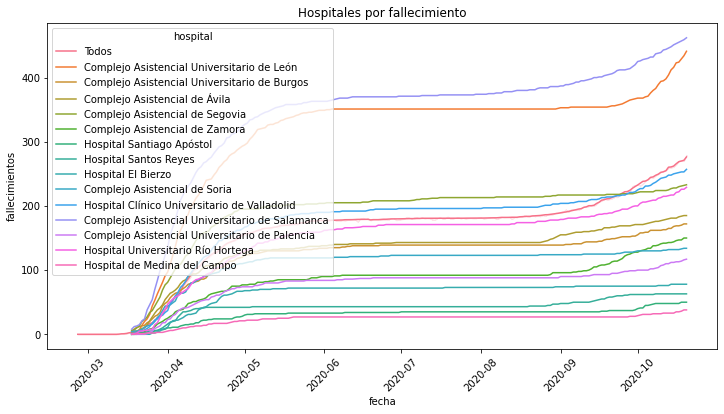

In [271]:
f, ax = plt.subplots(figsize=(12,6))
#ax.set_yscale('log') #price in logarithmic scale for a better view
sns.lineplot(x = 'fecha', y = 'fallecimientos', hue="hospital", data = hospitales_covid, ci = False);
plt.xticks(rotation=45)
plt.title('Hospitales por fallecimiento');

Aqui podemos observar que el `Complejo Asistencial Universitario de Salamanca` tiene la mayor cantidad de fallecidos. Ahora veamos en que provincia se encuentra dicho hospital.

In [272]:
provincia = hospitales_covid.loc[:, 'hospital'] == 'Complejo Asistencial Universitario de Salamanca'
hospitales_provincia = hospitales_covid.loc[provincia]
hospitales_provincia['provincia']

178     Salamanca
203     Salamanca
223     Salamanca
251     Salamanca
257     Salamanca
          ...    
4734    Salamanca
4771    Salamanca
4790    Salamanca
4807    Salamanca
4840    Salamanca
Name: provincia, Length: 210, dtype: object

Ahora ya sabemos que la provincia es evidentemente Salamanca

2. Mostrar un listado de las provincias que han recogido datos de evolución del Covid-19. Para cada provincia se desea conocer el total de altas producidas. Calcular el número total de altas por Comunidad Autónoma.


In [273]:
provincias = hospitales_covid.groupby('provincia') #datos de provincias que han recogido datos del covid
provincias.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine
0,2020-02-26,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX
1,2020-02-26,Todos,Sevilla,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX
2,2020-02-26,Todos,Almería,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX
3,2020-02-26,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX
4,2020-02-26,Todos,Córdoba,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2020-03-22,Complejo Asistencial Universitario de Palencia,Palencia,3.000000,30.00000,1.00000,6.000000,0.402262,0.000000,2.000000,0.000000,0,34120
262,2020-03-22,Complejo Asistencial de Zamora,Zamora,8.000000,38.00000,0.00000,11.000000,0.402262,1.000000,4.000000,1.000000,3,49275
264,2020-03-22,Complejo Asistencial de Soria,Soria,6.000000,39.00000,2.00000,8.000000,0.402262,3.000000,8.000000,2.000000,8,42173
268,2020-03-22,Complejo Asistencial de Ávila,Ávila,14.000000,59.00000,0.00000,4.000000,0.402262,2.000000,16.000000,2.000000,9,5019


In [274]:
provincias.tail()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine
4734,2020-10-16,Complejo Asistencial Universitario de Salamanca,Salamanca,10.0,117.0,2.0,23.0,0.380000,6.0,1833.0,2.0,453,37274
4737,2020-10-16,Todos,Jaén,18.0,1166.0,1.0,122.0,0.402262,120.0,3500.0,1.0,232,XXXX
4738,2020-10-16,Todos,Huelva,4.0,305.0,0.0,36.0,0.402262,21.0,813.0,3.0,65,XXXX
4740,2020-10-16,Todos,Granada,35.0,1757.0,1.0,165.0,0.402262,33.0,4521.0,5.0,372,XXXX
4741,2020-10-16,Todos,Córdoba,20.0,1130.0,2.0,135.0,0.402262,104.0,3843.0,5.0,208,XXXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4839,2020-10-20,Complejo Asistencial de Segovia,Segovia,3.0,33.0,0.0,2.0,0.200000,2.0,1051.0,1.0,233,40004
4840,2020-10-20,Complejo Asistencial Universitario de Salamanca,Salamanca,16.0,140.0,1.0,25.0,0.420000,14.0,1877.0,3.0,462,37274
4841,2020-10-20,Complejo Asistencial Universitario de León,León,16.0,232.0,3.0,25.0,0.570000,21.0,1741.0,7.0,441,24089
4842,2020-10-20,Todos,Cádiz,14.0,1103.0,0.0,124.0,0.402262,103.0,4406.0,5.0,255,XXXX


In [275]:
altas = provincias['nuevas_altas'].sum() #suma de nuevas altas por provincia

In [276]:
altas #muestra los resultados

provincia
Almería        7509.024601
Burgos         1458.540354
Cádiz          4708.024601
Córdoba        4228.024601
Granada        4999.024601
Huelva         1159.024601
Jaén           3943.024601
León           2074.000000
Málaga        11341.024601
Palencia        567.000000
Salamanca      1873.000000
Segovia        1049.000000
Sevilla        7207.024601
Soria           537.000000
Valladolid     2794.000000
Zamora          629.000000
Ávila           939.000000
Name: nuevas_altas, dtype: float64

Para continuar con la cantidad de altas por comunidad autonomas vamos a utilizar el dataframe `Poblacion_superficie_comunidades.csv` 

In [277]:
comunidades = pd.read_csv('./data/T_Poblacion_superficie_comunidades.csv', skiprows=2) #aplicamos el parametro skiprows para evitar las primeras filas porque no son los header del fichero, entonces no las necesitamos

In [278]:
comunidades.head() #aqui observamos que la columna de provincia no tiene nombre

,Unnamed: 0,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14
1,Barcelona,7733,B,5664579,CATALUÑA,C09
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10
3,Sevilla,14036,SE,1942389,ANDALUCÍA,C01
4,Alicante,5817,A,1858683,COMUNIDAD VALENCIANA,C10


In [279]:
comunidades.rename(columns={'Unnamed: 0':'provincia'},
               inplace=True)
comunidades.columns #agregamos la columna provincia

Index(['provincia', 'Superficie (Km2)', 'Siglas provincia', 'Población',
       'Comunidad Autónoma', 'Cod. Comunidad Autónoma'],
      dtype='object')

Ahora hacemos un merge o union entre el dataset provincias y el data set comunidades para que nos figuren las comunidades autonomas

In [280]:
result=pd.merge(hospitales_covid,comunidades,on=['provincia'],how='inner')
result.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
0,2020-02-26,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,10127,H,521870,ANDALUCÍA,C01
1,2020-02-27,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,10127,H,521870,ANDALUCÍA,C01
2,2020-02-28,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,10127,H,521870,ANDALUCÍA,C01
3,2020-02-29,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,10127,H,521870,ANDALUCÍA,C01
4,2020-03-01,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,10127,H,521870,ANDALUCÍA,C01


In [281]:
result.shape

(4844, 18)

In [282]:
altas_comunidades = result.groupby('Comunidad Autónoma').sum() #agrupo por comunidad autonoma
altas_comunidades

,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,Superficie (Km2),Población
Comunidad Autónoma,,,,,,,,,,,
ANDALUCÍA,12254.713132,1.470847e+06,1125.556714,175962.709328,765.906667,45094.196806,3.497942e+06,2218.938767,292920,20848086,2002589120
CASTILLA Y LEÓN,11064.628134,1.111962e+05,883.829639,20087.945770,1182.650000,11920.540354,1.629576e+06,2587.984692,393423,32296740,968636970


In [283]:
suma_altas_comunidades = altas_comunidades['nuevas_altas'] #mostramos las nuevas altas sumadas para observar las alta por comunidad autonoma
suma_altas_comunidades

Comunidad Autónoma
ANDALUCÍA          45094.196806
CASTILLA Y LEÓN    11920.540354
Name: nuevas_altas, dtype: float64

3. Mostrar un listado de las comunidades autónomas de España

In [284]:
comunidades['Comunidad Autónoma'].unique() #mostramos todas las comunidades autonomas

array(['COMUNIDAD DE MADRID', 'CATALUÑA', 'COMUNIDAD VALENCIANA',
       'ANDALUCÍA', 'REGIÓN DE MURCIA', 'PAÍS VASCO', 'ISLAS BALEARES',
       'GALICIA', 'CANARIAS', 'ASTURIAS', 'ARAGÓN', 'CASTILLA-LA MANCHA',
       'EXTREMADURA', 'CANTABRIA', 'CASTILLA Y LEÓN', 'LA RIOJA',
       'MELILLA', 'CEUTA'], dtype=object)

### Sección 2.

1. Seleccionar los datos de evolución de Covid-19 registrados en el hospital Complejo Asistencial de Soria.

In [285]:
hospitalasistencialdesoria = hospitales_covid[hospitales_covid['hospital'] == "Complejo Asistencial de Soria"]
hospitalasistencialdesoria

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine
176,2020-03-18,Complejo Asistencial de Soria,Soria,5.0,15.0,0.0,5.0,0.402262,2.0,4.0,2.0,4,42173
204,2020-03-19,Complejo Asistencial de Soria,Soria,7.0,23.0,1.0,6.0,0.402262,0.0,4.0,1.0,5,42173
230,2020-03-20,Complejo Asistencial de Soria,Soria,6.0,29.0,1.0,7.0,0.402262,0.0,4.0,0.0,5,42173
247,2020-03-21,Complejo Asistencial de Soria,Soria,10.0,39.0,1.0,7.0,0.402262,1.0,5.0,1.0,6,42173
264,2020-03-22,Complejo Asistencial de Soria,Soria,6.0,39.0,2.0,8.0,0.402262,3.0,8.0,2.0,8,42173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,2020-10-16,Complejo Asistencial de Soria,Soria,4.0,20.0,0.0,4.0,0.400000,2.0,532.0,0.0,132,42173
4764,2020-10-17,Complejo Asistencial de Soria,Soria,3.0,21.0,1.0,5.0,0.500000,2.0,534.0,0.0,132,42173
4799,2020-10-18,Complejo Asistencial de Soria,Soria,2.0,24.0,0.0,3.0,0.300000,1.0,535.0,1.0,133,42173
4820,2020-10-19,Complejo Asistencial de Soria,Soria,0.0,23.0,0.0,3.0,0.300000,2.0,537.0,1.0,134,42173


2. Seleccionar los datos de evolución de Covid-19 registrados en la provincia de Soria.

In [286]:
soria = hospitales_covid[hospitales_covid['provincia'] == "Soria"]
soria

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine
176,2020-03-18,Complejo Asistencial de Soria,Soria,5.0,15.0,0.0,5.0,0.402262,2.0,4.0,2.0,4,42173
204,2020-03-19,Complejo Asistencial de Soria,Soria,7.0,23.0,1.0,6.0,0.402262,0.0,4.0,1.0,5,42173
230,2020-03-20,Complejo Asistencial de Soria,Soria,6.0,29.0,1.0,7.0,0.402262,0.0,4.0,0.0,5,42173
247,2020-03-21,Complejo Asistencial de Soria,Soria,10.0,39.0,1.0,7.0,0.402262,1.0,5.0,1.0,6,42173
264,2020-03-22,Complejo Asistencial de Soria,Soria,6.0,39.0,2.0,8.0,0.402262,3.0,8.0,2.0,8,42173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,2020-10-16,Complejo Asistencial de Soria,Soria,4.0,20.0,0.0,4.0,0.400000,2.0,532.0,0.0,132,42173
4764,2020-10-17,Complejo Asistencial de Soria,Soria,3.0,21.0,1.0,5.0,0.500000,2.0,534.0,0.0,132,42173
4799,2020-10-18,Complejo Asistencial de Soria,Soria,2.0,24.0,0.0,3.0,0.300000,1.0,535.0,1.0,133,42173
4820,2020-10-19,Complejo Asistencial de Soria,Soria,0.0,23.0,0.0,3.0,0.300000,2.0,537.0,1.0,134,42173


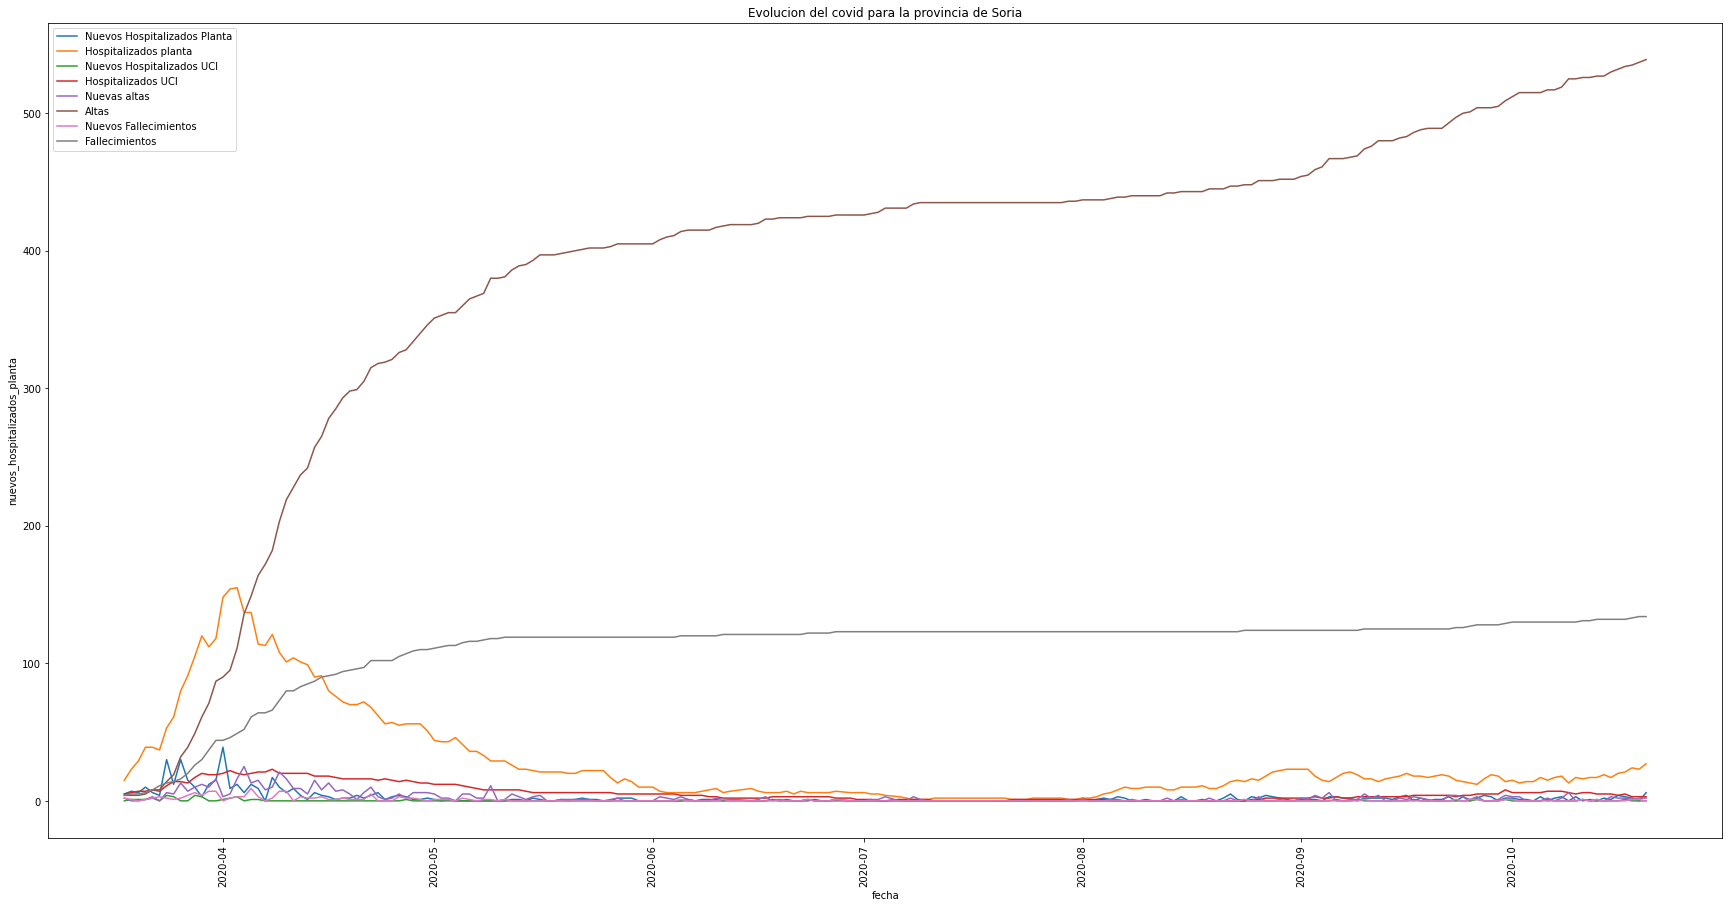

In [287]:
fig, ax = plt.subplots(figsize = (30, 15))
sns.lineplot(x = "fecha", y = "nuevos_hospitalizados_planta", data = soria, estimator = "mean", label = "Nuevos Hospitalizados Planta", ci = False);
sns.lineplot(x = "fecha", y = "hospitalizados_planta", data = soria, estimator = "mean", label = "Hospitalizados planta", ci = False);
sns.lineplot(x = "fecha", y = "nuevos_hospitalizados_uci", data = soria, estimator = "mean", label = "Nuevos Hospitalizados UCI", ci = False);
sns.lineplot(x = "fecha", y = "hospitalizados_uci", data = soria, estimator = "mean", label = "Hospitalizados UCI", ci = False);
sns.lineplot(x = "fecha", y = "nuevas_altas", data = soria, estimator = "mean", label = "Nuevas altas", ci = False);
sns.lineplot(x = "fecha", y = "altas", data = soria, estimator = "mean", label = "Altas", ci = False);
sns.lineplot(x = "fecha", y = "nuevos_fallecimientos", data = soria, estimator = "mean", label = "Nuevos Fallecimientos", ci = False);
sns.lineplot(x = "fecha", y = "fallecimientos", data = soria, estimator = "mean", label = "Fallecimientos", ci = False);
plt.xticks(rotation=90)
plt.title('Evolucion del covid para la provincia de Soria');

3. Seleccionar los datos de evolución de Codvid-19 registrados el día 2020-03-22.


In [288]:
covid_veintidos_marzo = hospitales_covid[hospitales_covid['fecha'] == "2020-03-22"] #filtro por fecha
covid_veintidos_marzo

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine
256,2020-03-22,Hospital El Bierzo,León,2.0,13.0,2.00000,5.000000,0.402262,0.000000,0.0,0.0,0,24089
257,2020-03-22,Complejo Asistencial Universitario de Salamanca,Salamanca,34.0,147.0,2.00000,14.000000,0.402262,7.000000,20.0,6.0,21,37274
258,2020-03-22,Todos,Almería,6.0,23.0,0.41482,40.472885,0.402262,11.770177,2.0,1.0,2,XXXX
259,2020-03-22,Hospital Santiago Apóstol,Burgos,3.0,10.0,0.00000,0.000000,0.402262,1.000000,8.0,1.0,2,9059
260,2020-03-22,Hospital de Medina del Campo,Valladolid,2.0,6.0,0.00000,0.000000,0.402262,0.000000,3.0,0.0,1,47186
261,2020-03-22,Complejo Asistencial Universitario de Palencia,Palencia,3.0,30.0,1.00000,6.000000,0.402262,0.000000,2.0,0.0,0,34120
262,2020-03-22,Complejo Asistencial de Zamora,Zamora,8.0,38.0,0.00000,11.000000,0.402262,1.000000,4.0,1.0,3,49275
263,2020-03-22,Hospital Universitario Río Hortega,Valladolid,9.0,65.0,2.00000,10.000000,0.402262,1.000000,7.0,0.0,5,47186
264,2020-03-22,Complejo Asistencial de Soria,Soria,6.0,39.0,2.00000,8.000000,0.402262,3.000000,8.0,2.0,8,42173
265,2020-03-22,Complejo Asistencial Universitario de León,León,26.0,93.0,1.00000,10.000000,0.402262,7.000000,10.0,7.0,14,24089


4. Se desea estudiar la incidencia que ha tenido el Covid-19 dependiendo de los grupos de edad. Seleccionar los datos de evolución de Codvid-19 asociados al grupo de edad 70-79.

Para contestar a esta pregunta debemos hacer uso del fichero `T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv` el cual vamos a cargar y explorar a continuacion

In [289]:
enfermos_sexo = pd.read_csv('./data/T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv', delimiter=';')

In [290]:
enfermos_sexo.head() #observamos que los datos estan ordenados del mas reciente al mas lejano y nosotros queremos ordenarlos alreves

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
0,2020-10-19,AV,0-9,271,234,505
1,2020-10-19,PA,0-9,247,225,472
2,2020-10-19,SO,0-9,157,151,308
3,2020-10-19,ZA,0-9,296,278,574
4,2020-10-19,BU,10-19,889,779,1668


In [291]:
enfermos_sexo.dtypes #debo cambiar la fecha de tipo objeto a timo dataframe para poder ordenarla 

fecha         object
siglas        object
grupo_edad    object
hombres        int64
mujeres        int64
enfermos       int64
dtype: object

In [292]:
enfermos_sexo["fecha"]=pd.to_datetime(enfermos_sexo["fecha"])

In [293]:
enfermos_sexo.dtypes #chequeamos los resultados

fecha         datetime64[ns]
siglas                object
grupo_edad            object
hombres                int64
mujeres                int64
enfermos               int64
dtype: object

In [294]:
enfermos_sexo = enfermos_sexo.sort_values(["fecha"])

In [295]:
enfermos_setenta_setentaynueve = enfermos_sexo[enfermos_sexo['grupo_edad'] == "70-79"]
enfermos_setenta_setentaynueve

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
14323,2020-04-03,BU,70-79,203,161,364
14324,2020-04-03,SA,70-79,246,254,500
14325,2020-04-03,SO,70-79,61,43,104
14398,2020-04-03,ZA,70-79,43,40,83
14395,2020-04-03,AV,70-79,126,119,245
...,...,...,...,...,...,...
84,2020-10-19,SO,70-79,248,226,474
85,2020-10-19,ZA,70-79,279,275,554
54,2020-10-19,BU,70-79,707,718,1425
55,2020-10-19,SA,70-79,829,904,1733


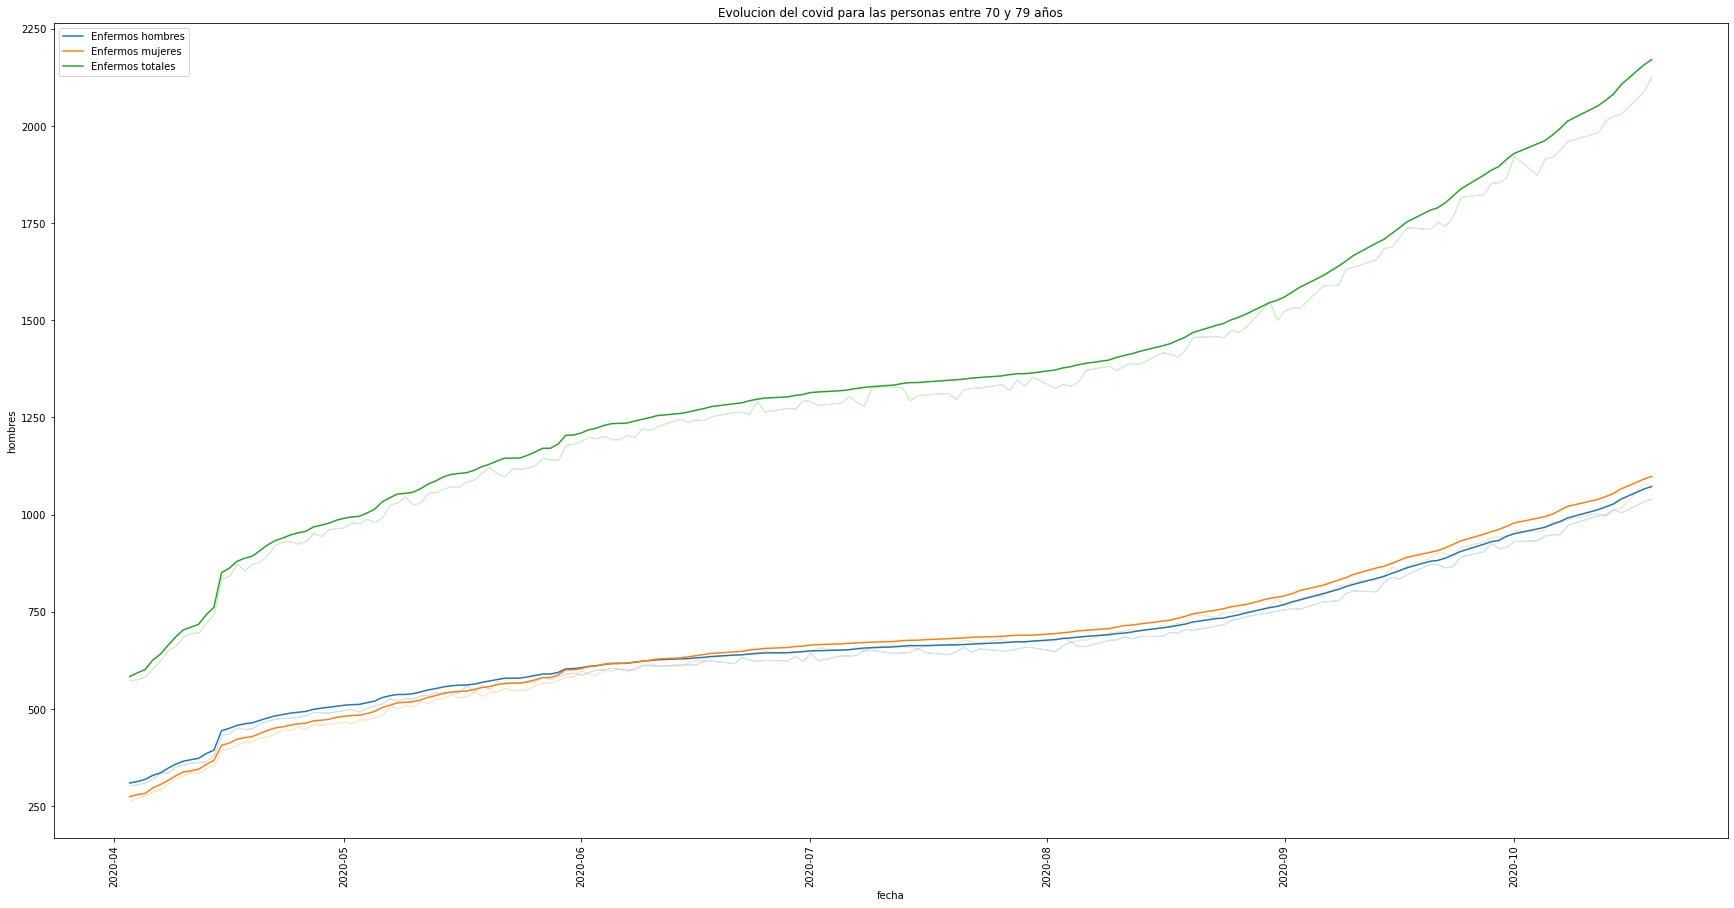

In [296]:
fig, ax = plt.subplots(figsize = (30, 15))
sns.lineplot(x = "fecha", y = "hombres", data = enfermos_setenta_setentaynueve, estimator = "mean", label = "Enfermos hombres", ci = False);
sns.lineplot(x = "fecha", y = "mujeres", data = enfermos_setenta_setentaynueve, estimator = "mean", label = "Enfermos mujeres", ci = False);
sns.lineplot(x = "fecha", y = "enfermos", data = enfermos_setenta_setentaynueve, estimator = "mean", label = "Enfermos totales", ci = False);
plt.xticks(rotation=90)
plt.title('Evolucion del covid para las personas entre 70 y 79 años');

### Sección 3.

1. Se desea estudiar la incidencia que ha tenido el Covid-19 dependiendo de los grupos de edad. Seleccionar los datos de evolución de Codvid-19 asociados al grupo de edad 70-79 en la provincia de siglas SO.

In [297]:
so_enfermos = enfermos_setenta_setentaynueve[enfermos_setenta_setentaynueve['siglas'] == "SO"]
so_enfermos.head()

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
14325,2020-04-03,SO,70-79,61,43,104
14279,2020-04-04,SO,70-79,63,43,106
14153,2020-04-05,SO,70-79,64,43,107
14122,2020-04-06,SO,70-79,66,45,111
13972,2020-04-07,SO,70-79,67,48,115


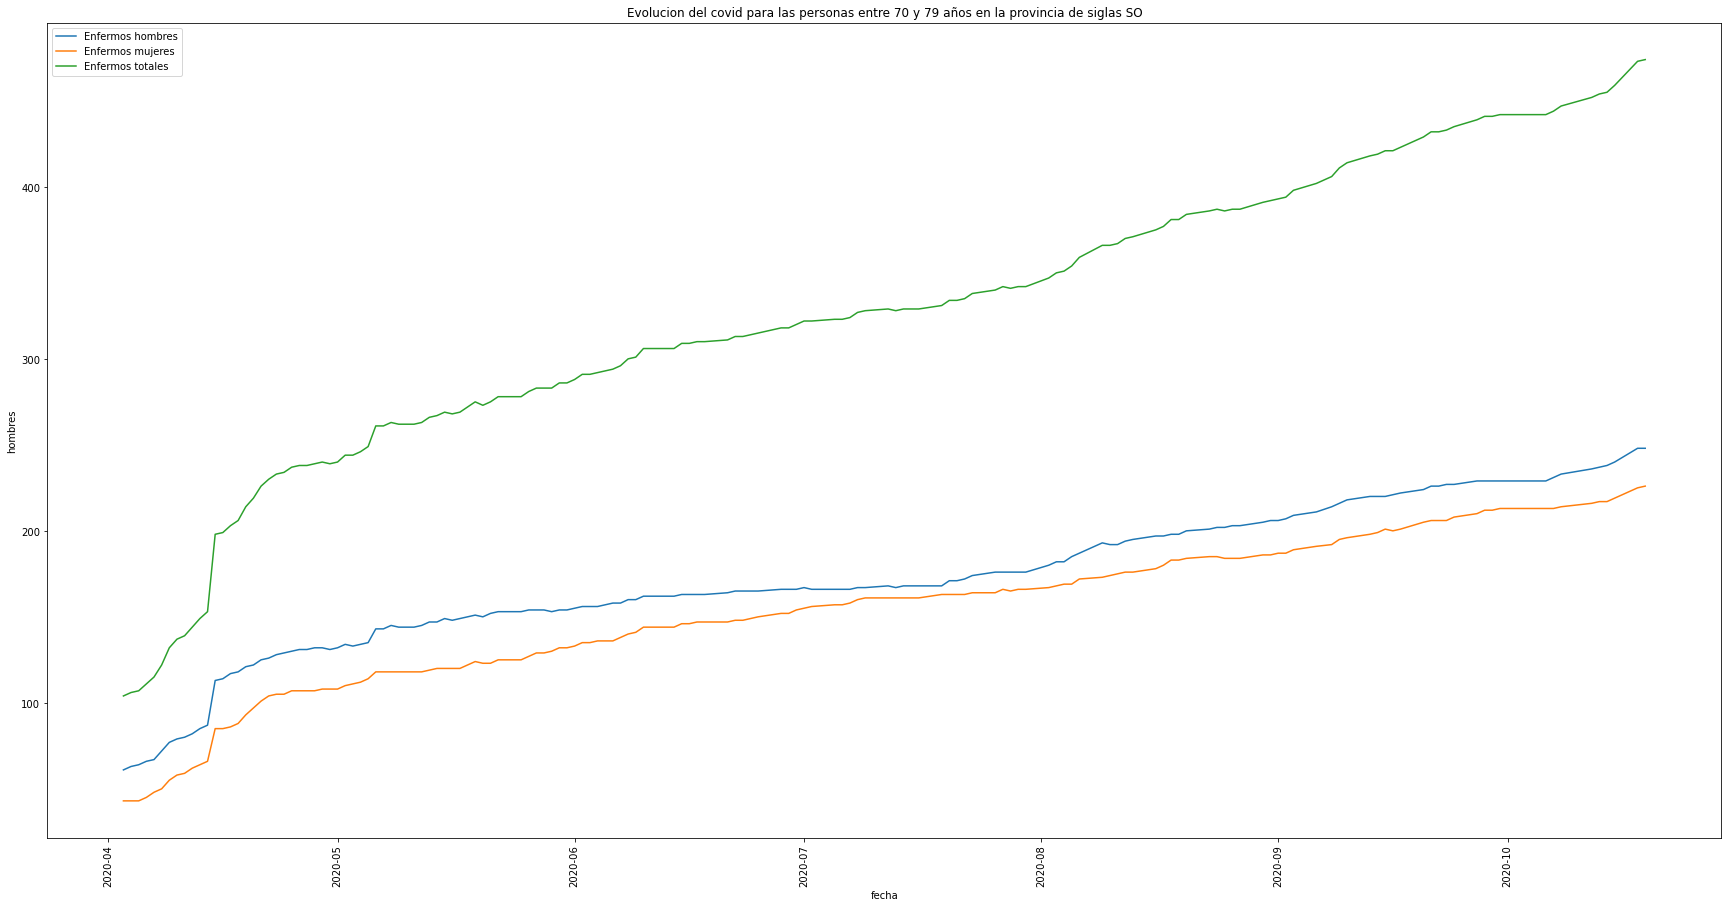

In [298]:
fig, ax = plt.subplots(figsize = (30, 15))
sns.lineplot(x = "fecha", y = "hombres", data = so_enfermos, estimator = "mean", label = "Enfermos hombres", ci = False);
sns.lineplot(x = "fecha", y = "mujeres", data = so_enfermos, estimator = "mean", label = "Enfermos mujeres", ci = False);
sns.lineplot(x = "fecha", y = "enfermos", data = so_enfermos, estimator = "mean", label = "Enfermos totales", ci = False);
plt.xticks(rotation=90)
plt.title('Evolucion del covid para las personas entre 70 y 79 años en la provincia de siglas SO');

2. Se desea estudiar la evolución que ha tenido el Covid-19 dependiendo de los grupos de edad. Seleccionar los datos de evolución de Codvid-19 asociados a la provincia de siglas SA y al grupo de edad 60-69.

In [299]:
enfermos_sesenta_sesentaynueve = enfermos_sexo[enfermos_sexo['grupo_edad'] == "60-69"] #filtramos por el grupo de edad que queremos visualizar
sa_enfermos = enfermos_sesenta_sesentaynueve[enfermos_sesenta_sesentaynueve['siglas'] == "SA"] #filtramos por las siglas de la provincia
sa_enfermos #mostramos los resultados

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
14391,2020-04-03,SA,60-69,407,459,866
14276,2020-04-04,SA,60-69,412,461,873
14186,2020-04-05,SA,60-69,412,464,876
14062,2020-04-06,SA,60-69,433,488,921
14028,2020-04-07,SA,60-69,444,495,939
...,...,...,...,...,...,...
443,2020-10-13,SA,60-69,1150,1282,2432
348,2020-10-14,SA,60-69,1154,1293,2447
261,2020-10-15,SA,60-69,1160,1308,2468
167,2020-10-18,SA,60-69,1185,1320,2505


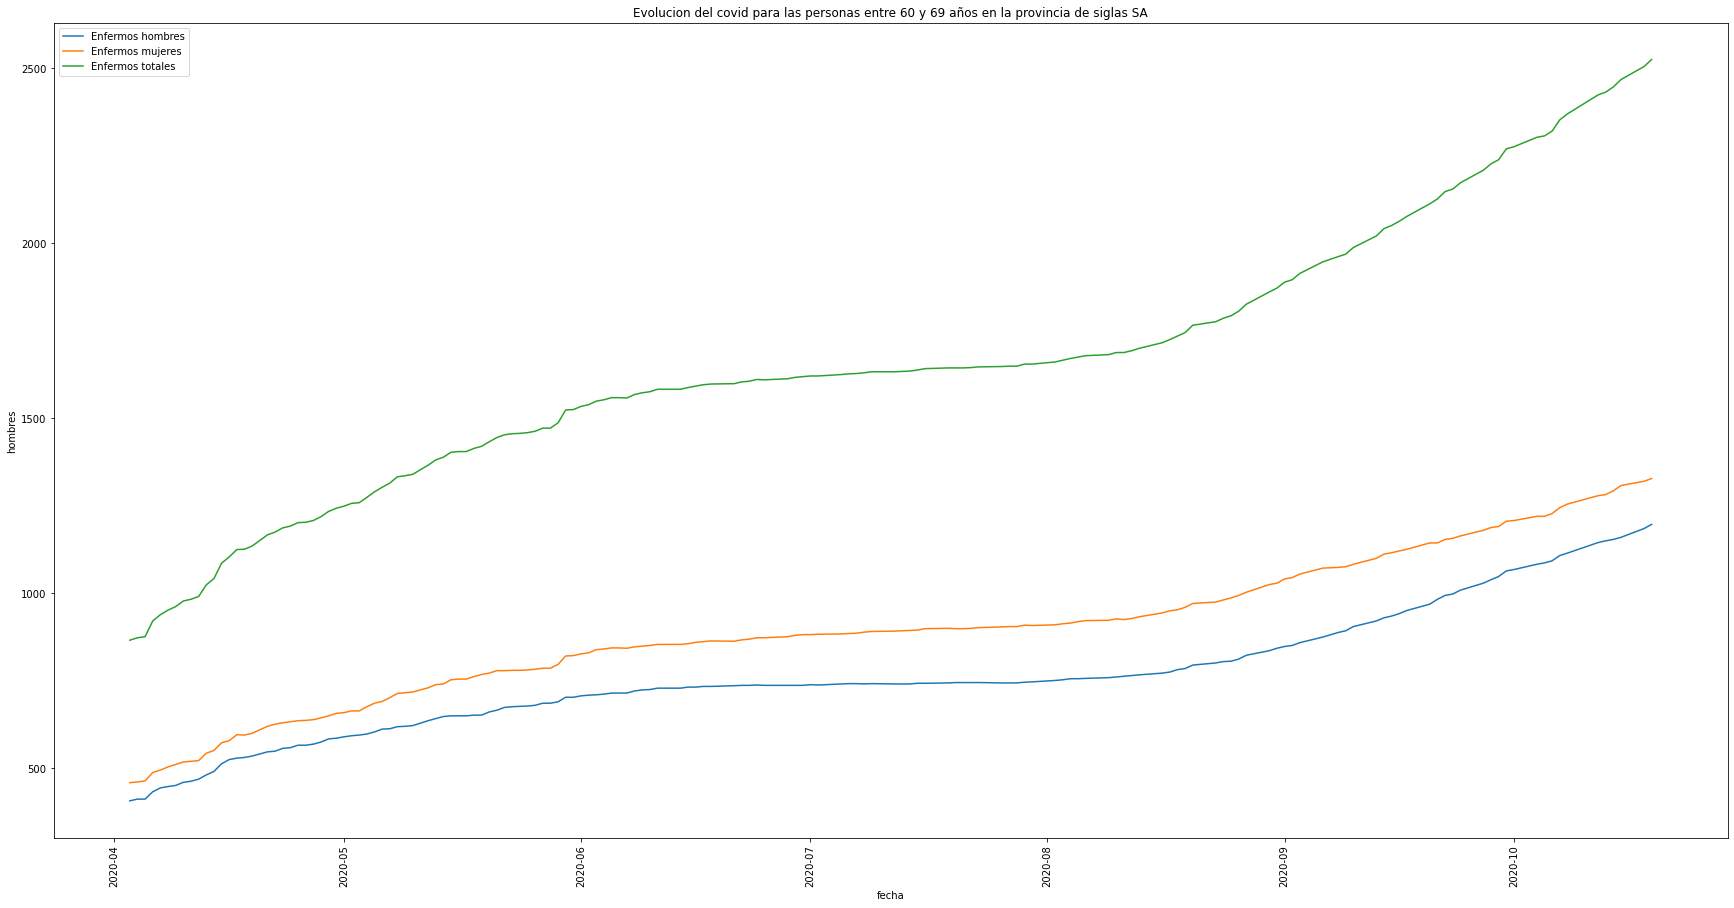

In [300]:
fig, ax = plt.subplots(figsize = (30, 15))
sns.lineplot(x = "fecha", y = "hombres", data = sa_enfermos, estimator = "mean", label = "Enfermos hombres", ci = False);
sns.lineplot(x = "fecha", y = "mujeres", data = sa_enfermos, estimator = "mean", label = "Enfermos mujeres", ci = False);
sns.lineplot(x = "fecha", y = "enfermos", data = sa_enfermos, estimator = "mean", label = "Enfermos totales", ci = False);
plt.xticks(rotation=90)
plt.title('Evolucion del covid para las personas entre 60 y 69 años en la provincia de siglas SA');

3. Se desea estudiar la evolución de los nuevos fallecimientos producidos por Covid-19 en las distintas provincias. Seleccionar los datos de evolución de Covid-19 asociados a la provincia de Valladolid el día '2020-05-10'.

In [301]:
valladolid = hospitales_covid[hospitales_covid['provincia'] == "Valladolid"] #filtramos por la provincia Valladolid

In [302]:
valladolid_veinticinco_mayo = valladolid[valladolid['fecha'] == "2020-05-10"] #filtramos por la fecha que quiero observar
valladolid_veinticinco_mayo.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine
1347,2020-05-10,Hospital Universitario Río Hortega,Valladolid,3.0,39.0,0.0,19.0,0.402262,2.0,678.0,0.0,144,47186
1350,2020-05-10,Hospital Clínico Universitario de Valladolid,Valladolid,4.0,63.0,0.0,12.0,0.402262,2.0,701.0,1.0,179,47186
1351,2020-05-10,Hospital de Medina del Campo,Valladolid,0.0,12.0,0.0,0.0,0.402262,3.0,108.0,0.0,24,47186


In [303]:
valladolid_veinticinco_mayo['nuevos_fallecimientos']  #observamos que hay solo una persona fallecida

1347    0.0
1350    1.0
1351    0.0
Name: nuevos_fallecimientos, dtype: float64

4. Se desea estudiar la evolución de los nuevos fallecimientos producidos por Covid-19 en las distintas provincias. Seleccionar los datos de evolución de Covid-19 recogidos en el mes de Abril.

In [304]:
hospitales_covid['mes'] = pd.DatetimeIndex(hospitales_covid['fecha']).month #aqui estamos creando una nueva columna con el mes que figura en la fecha
hospitales_covid

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,mes
0,2020-02-26,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2
1,2020-02-26,Todos,Sevilla,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2
2,2020-02-26,Todos,Almería,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2
3,2020-02-26,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2
4,2020-02-26,Todos,Córdoba,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4839,2020-10-20,Complejo Asistencial de Segovia,Segovia,3.000000,33.00000,0.00000,2.000000,0.200000,2.000000,1051.000000,1.000000,233,40004,10
4840,2020-10-20,Complejo Asistencial Universitario de Salamanca,Salamanca,16.000000,140.00000,1.00000,25.000000,0.420000,14.000000,1877.000000,3.000000,462,37274,10
4841,2020-10-20,Complejo Asistencial Universitario de León,León,16.000000,232.00000,3.00000,25.000000,0.570000,21.000000,1741.000000,7.000000,441,24089,10
4842,2020-10-20,Todos,Cádiz,14.000000,1103.00000,0.00000,124.000000,0.402262,103.000000,4406.000000,5.000000,255,XXXX,10


In [305]:
covid_abril = hospitales_covid[hospitales_covid['mes'] == 4] #filtramos los datos por el mes de abril
covid_abril

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,mes
476,2020-04-01,Hospital El Bierzo,León,9.0,95.0,2.0,13.0,0.402262,8.0,34.0,2.0,11,24089,4
477,2020-04-01,Complejo Asistencial de Soria,Soria,39.0,148.0,1.0,20.0,0.402262,3.0,90.0,0.0,44,42173,4
478,2020-04-01,Hospital Clínico Universitario de Valladolid,Valladolid,25.0,231.0,4.0,53.0,0.402262,24.0,89.0,3.0,37,47186,4
479,2020-04-01,Complejo Asistencial de Zamora,Zamora,8.0,97.0,0.0,14.0,0.402262,8.0,51.0,2.0,25,49275,4
480,2020-04-01,Complejo Asistencial de Segovia,Segovia,19.0,308.0,0.0,23.0,0.402262,21.0,210.0,4.0,81,40004,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2020-04-30,Complejo Asistencial Universitario de Salamanca,Salamanca,5.0,147.0,2.0,33.0,0.402262,22.0,1008.0,5.0,324,37274,4
1132,2020-04-30,Hospital Santiago Apóstol,Burgos,1.0,17.0,0.0,0.0,0.402262,4.0,100.0,1.0,28,9059,4
1133,2020-04-30,Complejo Asistencial Universitario de Burgos,Burgos,2.0,88.0,0.0,24.0,0.402262,6.0,571.0,1.0,120,9059,4
1134,2020-04-30,Complejo Asistencial de Ávila,Ávila,2.0,43.0,0.0,5.0,0.402262,6.0,554.0,0.0,127,5019,4


### Sección 4.

1. En el fichero T_situacion-epidemiologica-coronavirus-provincias.csv se encuentra la evolución diaria de enfermos por Covid-19 en varias de las provincias Españolas. Calcula el número total de casos confirmados en la provincia de Palencia.

Para contestar a la pregunta anterior vamos a tener que utilizar el fichero `T_situacion-epidemiologica-coronavirus-provincias.csv`

In [306]:
provincia_covid = pd.read_csv('./data/T_situacion-epidemiologica-coronavirus-provincias.csv', delimiter=';')

Ahora exploremos un poco como esta compuesto este dataset

In [307]:
provincia_covid.head() #primeras observaciones

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
0,2020-02-26,Sevilla,1,NaN,NaN,0.0,XXXX,NaN
1,2020-02-26,Almería,0,NaN,NaN,0.0,XXXX,NaN
2,2020-02-26,Cádiz,0,NaN,NaN,0.0,XXXX,NaN
3,2020-02-26,Córdoba,0,NaN,NaN,0.0,XXXX,NaN
4,2020-02-26,Málaga,0,NaN,NaN,0.0,XXXX,NaN


In [308]:
provincia_covid.tail() #ultimas observaciones

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
3879,2020-10-20,Salamanca,11280,169.0,1877.0,462.0,37274,"40.833333,-6.0"
3880,2020-10-20,León,11174,162.0,2078.0,519.0,24089,"42.666667,-6.0"
3881,2020-10-20,Burgos,10834,134.0,1450.0,285.0,9059,"42.383333,-3.666667"
3882,2020-10-20,Cádiz,10001,223.0,4406.0,255.0,XXXX,NaN
3883,2020-10-20,Almería,9840,71.0,7205.0,130.0,XXXX,NaN


In [309]:
provincia_covid.shape #tamaño del dataset

(3884, 8)

In [310]:
provincia_covid.dtypes #que tipos de objetos tiene el dataframe

fecha                 object
provincia             object
casos_confirmados      int64
nuevos_positivos     float64
altas                float64
fallecimientos       float64
codigo_ine            object
Posicion              object
dtype: object

In [311]:
provincia_covid.info() #info es una funcion que nos muestra un resumen global

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3884 entries, 0 to 3883
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              3884 non-null   object 
 1   provincia          3884 non-null   object 
 2   casos_confirmados  3884 non-null   int64  
 3   nuevos_positivos   3876 non-null   float64
 4   altas              3665 non-null   float64
 5   fallecimientos     3866 non-null   float64
 6   codigo_ine         3884 non-null   object 
 7   Posicion           1980 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 242.9+ KB


In [312]:
provincia_covid.isnull().sum() #observamos que los nulos no son tantos teniendo en cuenta el tamaño del dataframe. Vamos a trabajarlos mas adelante

fecha                   0
provincia               0
casos_confirmados       0
nuevos_positivos        8
altas                 219
fallecimientos         18
codigo_ine              0
Posicion             1904
dtype: int64

In [313]:
provincia_covid.duplicated().sum() #no tiene valores duplicados

0

In [314]:
provincia_covid["fecha"]=pd.to_datetime(provincia_covid["fecha"]) #convertimos la fecha a formato datetime para manipularla

In [315]:
prov_palencia = provincia_covid[provincia_covid['provincia'] == "Palencia"]
prov_palencia['casos_confirmados'].max() #sacamos el maximo de nuevos_positivos porq es un dato acumulado para ver la cantidad total de casos en la provincia de Palencia

4646

Ahora que mostramos los datos de Palencia, vamos a mostrarlo en un grafico

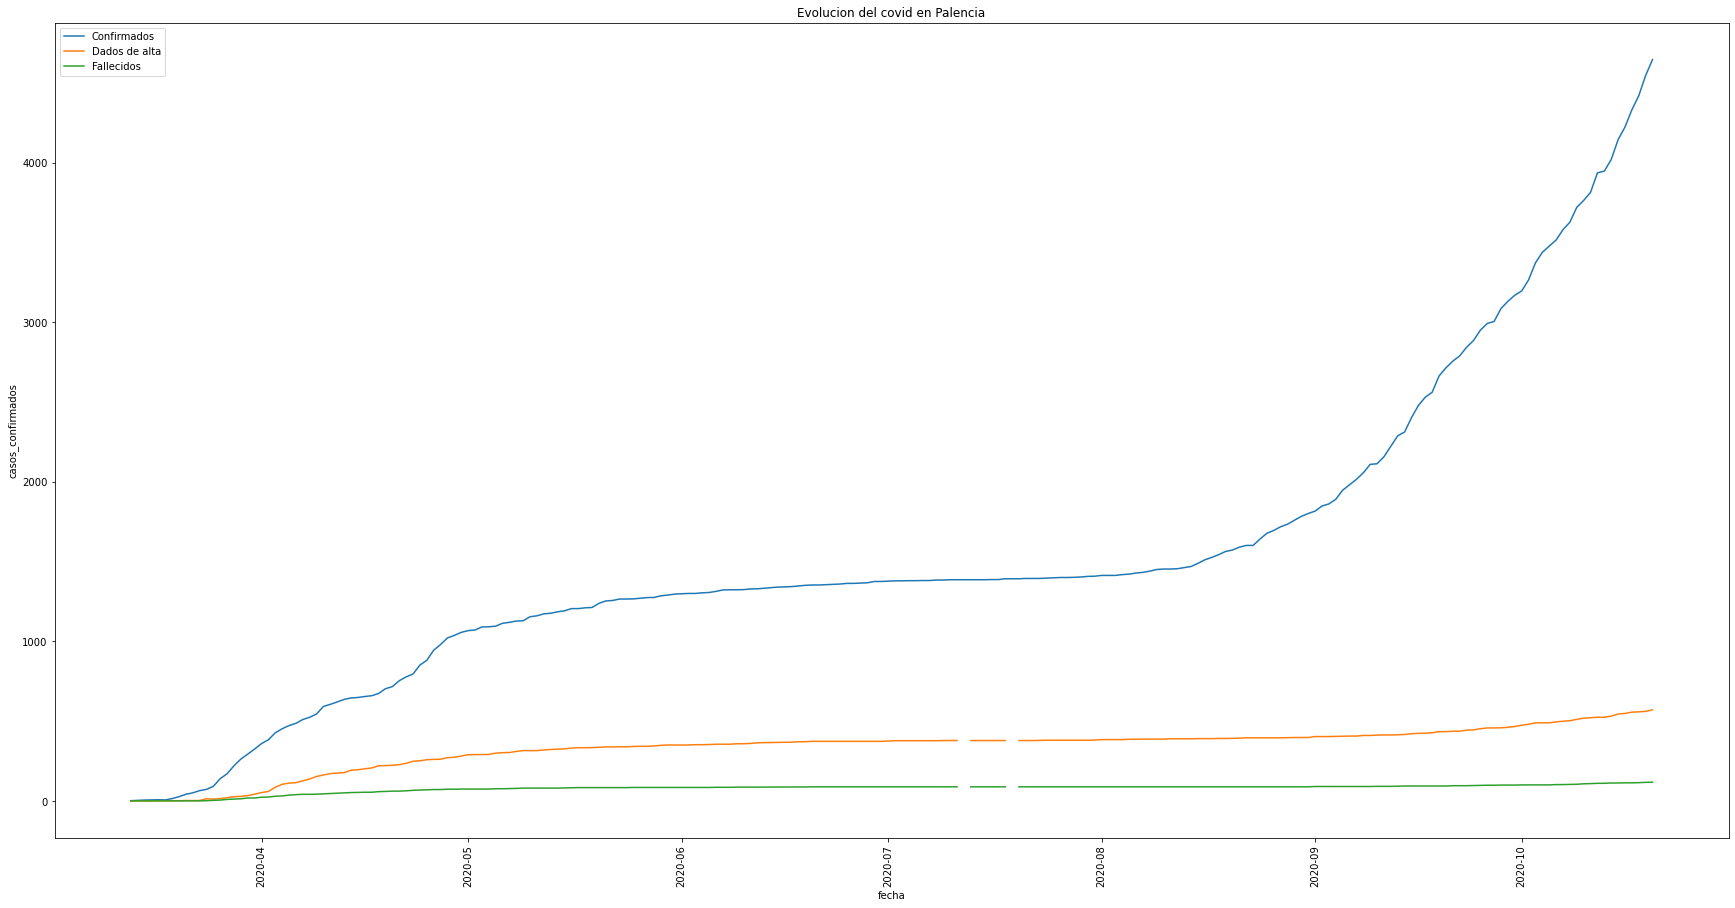

In [316]:
fig, ax = plt.subplots(figsize = (30, 15))
sns.lineplot(x = "fecha", y = "casos_confirmados", data = prov_palencia, estimator = "mean", label = "Confirmados", ci = False);
sns.lineplot(x = "fecha", y = "altas", data = prov_palencia, estimator = "mean", label = "Dados de alta", ci = False);
sns.lineplot(x = "fecha", y = "fallecimientos", data = prov_palencia, estimator = "mean", label = "Fallecidos", ci = False);
plt.xticks(rotation=90)
plt.title('Evolucion del covid en Palencia');

2. Calcula el número total de fallecimientos en la provincia de Zamora. Usa el fichero T_situacion- epidemiologica-coronavirus-provincias.csv donde se encuetra la evolución diaria de enfermos por Covid-19 en varias de las provincias Españolas.

In [317]:
prov_zamora = provincia_covid[provincia_covid['provincia'] == "Zamora"]
prov_zamora['fallecimientos'].max() #calculamos el maximo de fallecimientos porq es un dato acumulado

150.0

3. Calcula el número total de altas en la provincia de Valladolid.

In [318]:
valladolid['nuevas_altas'].sum() #Valladolid tuvo 2794 personas dadas de alta

2794.0

4. Calcula el número total de enfermos de sexo varón mayores de 80 años producidos en la provincia de Zamora (ZA)

In [319]:
zamora = enfermos_sexo[enfermos_sexo['siglas'] == "ZA"]
zamora_mayoresochenta = zamora[zamora['grupo_edad'] == ">80"]
zamora_mayoresochenta['hombres'].max() 

377

Hubo 377 hombres enfermos de covid mayores de ochenta años en las provincia de Zamora

### Sección 5.

1. El fichero T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv recoge los datos de enfermos por sexo y edad. Muestra los datos de la provincia de León (LE) ordenados por fecha y grupo de edad en orden ascendente.

In [320]:
leon = enfermos_sexo[enfermos_sexo['siglas'] == "LE"]
leon.sort_values(['fecha','grupo_edad'], ascending=True)

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
14330,2020-04-03,LE,0-9,153,144,297
14337,2020-04-03,LE,10-19,71,79,150
14341,2020-04-03,LE,20-29,144,216,360
14378,2020-04-03,LE,30-39,264,428,692
14315,2020-04-03,LE,40-49,394,629,1023
...,...,...,...,...,...,...
14,2020-10-19,LE,40-49,1526,2169,3695
45,2020-10-19,LE,50-59,1477,2110,3587
18,2020-10-19,LE,60-69,1275,1477,2752
22,2020-10-19,LE,70-79,962,931,1893


2. Muestra los datos asociados al grupo de edad '40-49' ordenados por fecha y provincia en orden descendente. El fichero T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv recoge los datos de enfermos por sexo y edad.

In [321]:
enfermo_cuarenta_cuarentaynueve = enfermos_sexo[enfermos_sexo['grupo_edad'] == "40-49"]
enfermo_cuarenta_cuarentaynueve.sort_values(['fecha','siglas'], ascending=False)

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos
76,2020-10-19,ZA,40-49,385,549,934
75,2020-10-19,VA,40-49,2082,2801,4883
15,2020-10-19,SO,40-49,442,622,1064
44,2020-10-19,SE,40-49,849,1171,2020
74,2020-10-19,SA,40-49,1390,1850,3240
...,...,...,...,...,...,...
14383,2020-04-03,PA,40-49,163,214,377
14315,2020-04-03,LE,40-49,394,629,1023
14385,2020-04-03,CyL,40-49,2615,3742,6357
14347,2020-04-03,BU,40-49,453,598,1051


3. Muestra los datos de evolución de enfermos por Covid asociados a la provincia de Soria. Los datos han de estar ordenados por fecha y nombre de hospital de forma decreciente de fecha y ascendente de hospital.

In [322]:
result_hospital=pd.merge(result,enfermos_sexo,left_on = ['Siglas provincia', 'fecha'], right_on = ['siglas', 'fecha']) #hacemos un merge por sigla y por la fecha para que coincidan
result_hospital.head() #muestra los primeros datos 

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,...,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma,siglas,grupo_edad,hombres,mujeres,enfermos
0,2020-04-03,Todos,Sevilla,53.0,712.0,8.0,71.0,0.402262,20.0,53.0,...,14036,SE,1942389,ANDALUCÍA,C01,SE,40-49,280,362,642
1,2020-04-03,Todos,Sevilla,53.0,712.0,8.0,71.0,0.402262,20.0,53.0,...,14036,SE,1942389,ANDALUCÍA,C01,SE,0-9,65,57,122
2,2020-04-03,Todos,Sevilla,53.0,712.0,8.0,71.0,0.402262,20.0,53.0,...,14036,SE,1942389,ANDALUCÍA,C01,SE,20-29,84,122,206
3,2020-04-03,Todos,Sevilla,53.0,712.0,8.0,71.0,0.402262,20.0,53.0,...,14036,SE,1942389,ANDALUCÍA,C01,SE,50-59,324,468,792
4,2020-04-03,Todos,Sevilla,53.0,712.0,8.0,71.0,0.402262,20.0,53.0,...,14036,SE,1942389,ANDALUCÍA,C01,SE,60-69,290,307,597


In [323]:
soria_covid = result_hospital[result_hospital['provincia'] == "Soria"] #filtramos por la provincia de Soria

In [324]:
soria_covid = pd.DataFrame(soria_covid, columns = ['fecha', 'hospital', 'enfermos']).sort_values(['fecha', 'hospital'], ascending = [False, True]) #mostramos solo las columnas que quiero y ordenamos de forma decreciente por fecha y ascendente por hospital 

In [325]:
soria_covid #mostramos los resultados

,fecha,hospital,enfermos
12519,2020-10-19,Complejo Asistencial de Soria,329
12520,2020-10-19,Complejo Asistencial de Soria,599
12521,2020-10-19,Complejo Asistencial de Soria,779
12522,2020-10-19,Complejo Asistencial de Soria,308
12523,2020-10-19,Complejo Asistencial de Soria,736
...,...,...,...
11146,2020-04-03,Complejo Asistencial de Soria,104
11147,2020-04-03,Complejo Asistencial de Soria,237
11148,2020-04-03,Complejo Asistencial de Soria,223
11149,2020-04-03,Complejo Asistencial de Soria,46


4. Muestra los datos asociados a las provincias de la comunidad autónoma de Andalucía. Muestra los datos ordenados de forma creciente de Superficie y decreciente de población


In [326]:
andalucia = result[result['Comunidad Autónoma'] == "ANDALUCÍA"]

In [327]:
provincias_andalucia = andalucia.sort_values(['Superficie (Km2)', 'Población'], ascending = [True, False])
provincias_andalucia = provincias_andalucia.groupby("provincia")
provincias_andalucia.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
1666,2020-02-26,Todos,Málaga,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,7306,MA,1661785,ANDALUCÍA,C01
1667,2020-02-27,Todos,Málaga,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7306,MA,1661785,ANDALUCÍA,C01
1668,2020-02-28,Todos,Málaga,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7306,MA,1661785,ANDALUCÍA,C01
1669,2020-02-29,Todos,Málaga,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7306,MA,1661785,ANDALUCÍA,C01
1670,2020-03-01,Todos,Málaga,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7306,MA,1661785,ANDALUCÍA,C01
714,2020-02-26,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,7440,CA,1240155,ANDALUCÍA,C01
715,2020-02-27,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7440,CA,1240155,ANDALUCÍA,C01
716,2020-02-28,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7440,CA,1240155,ANDALUCÍA,C01
717,2020-02-29,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7440,CA,1240155,ANDALUCÍA,C01
718,2020-03-01,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.000000,0,XXXX,7440,CA,1240155,ANDALUCÍA,C01


5. Muestra los datos de evolución de casos confirmados de Covid asociados a la provincia de Ávila. Los datos han de estar ordenados por fecha de forma decreciente.

In [328]:
avila = provincia_covid[provincia_covid['provincia'] == "Ávila"]
avila.head()

,fecha,provincia,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
134,2020-03-13,Ávila,3,3.0,0.0,0.0,5019,"40.616092,-4.929031"
148,2020-03-14,Ávila,10,7.0,0.0,0.0,5019,"40.616092,-4.929031"
175,2020-03-15,Ávila,10,0.0,0.0,0.0,5019,"40.616092,-4.929031"
190,2020-03-16,Ávila,17,7.0,0.0,0.0,5019,"40.616092,-4.929031"
197,2020-03-17,Ávila,18,1.0,1.0,0.0,5019,"40.616092,-4.929031"


In [329]:
avila = pd.DataFrame(avila, columns = ['fecha', 'provincia', 'casos_confirmados']).sort_values(['fecha'], ascending = False)
avila

,fecha,provincia,casos_confirmados
3877,2020-10-20,Ávila,4554
3862,2020-10-19,Ávila,4506
3840,2020-10-18,Ávila,4465
3824,2020-10-17,Ávila,4439
3807,2020-10-16,Ávila,4408
...,...,...,...
197,2020-03-17,Ávila,18
190,2020-03-16,Ávila,17
175,2020-03-15,Ávila,10
148,2020-03-14,Ávila,10


### Sección 6.

1. Añade una nueva columna llamada ratio_hombres al dataframe asociado al fichero T_situacion-enfermos-por-coronavirus-por-tramos-sexo.csv. El valor de dicha columna representa el porcentaje de hombres enfermos con respecto al total de enfermos

In [330]:
enfermos_sexo['ratio_hombres'] = (enfermos_sexo['hombres'] / enfermos_sexo['enfermos']) * 100
enfermos_sexo.head()

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos,ratio_hombres
14399,2020-04-03,BU,>80,216,247,463,46.652268
14333,2020-04-03,VA,0-9,162,155,317,51.104101
14334,2020-04-03,ZA,0-9,103,89,192,53.645833
14335,2020-04-03,CyL,0-9,884,824,1708,51.756440
14336,2020-04-03,AV,10-19,46,35,81,56.790123


2. Añade una nueva columna llamada diferencias al dataframe asociado al fichero T_situacion- enfermos-por-coronavirus-por-tramos-sexo.csv. El valor de dicha columna representa la diferencia entre los hombres enfermos y mujeres enfermas

In [331]:
enfermos_sexo['diferencias'] = enfermos_sexo['hombres'] - enfermos_sexo['mujeres']
enfermos_sexo.head()

,fecha,siglas,grupo_edad,hombres,mujeres,enfermos,ratio_hombres,diferencias
14399,2020-04-03,BU,>80,216,247,463,46.652268,-31
14333,2020-04-03,VA,0-9,162,155,317,51.104101,7
14334,2020-04-03,ZA,0-9,103,89,192,53.645833,14
14335,2020-04-03,CyL,0-9,884,824,1708,51.756440,60
14336,2020-04-03,AV,10-19,46,35,81,56.790123,11


3. Añade una nueva columna llamada nuevos_hospitalizados al dataframe asociado al fichero T_situacion-de-hospitalizados-por-coronavirus.csv. El valor de dicha columna representa la suma de los nuevos hospitalizados en planta y los nuevos hospitalizados en uci.

In [332]:
hospitales_covid['nuevos_hospitalizados'] = hospitales_covid['nuevos_hospitalizados_planta'] + hospitales_covid['nuevos_hospitalizados_uci']
hospitales_covid.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,mes,nuevos_hospitalizados
0,2020-02-26,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887
1,2020-02-26,Todos,Sevilla,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887
2,2020-02-26,Todos,Almería,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887
3,2020-02-26,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887
4,2020-02-26,Todos,Córdoba,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887


### Sección 7

1. Se desea conocer la media de nuevos hospitalizados en planta en cada uno de los hospitales.

In [333]:
hospitales_agrupados = hospitales_covid.groupby('hospital')
hospitales_agrupados['nuevos_hospitalizados_planta'].mean()

hospital
Complejo Asistencial Universitario de Burgos       4.308638
Complejo Asistencial Universitario de León         6.700000
Complejo Asistencial Universitario de Palencia     3.023810
Complejo Asistencial Universitario de Salamanca    8.919048
Complejo Asistencial de Segovia                    3.514286
Complejo Asistencial de Soria                      2.380952
Complejo Asistencial de Zamora                     3.019048
Complejo Asistencial de Ávila                      3.976190
Hospital Clínico Universitario de Valladolid       5.804762
Hospital El Bierzo                                 1.304762
Hospital Santiago Apóstol                          1.408638
Hospital Santos Reyes                              0.876190
Hospital Universitario Río Hortega                 6.119048
Hospital de Medina del Campo                       1.333333
Todos                                              6.436299
Name: nuevos_hospitalizados_planta, dtype: float64

2. Se desea conocer el número máximo de nuevos casos positivos registrado en cada uno de las provincias.

In [334]:
result_hospital_agrupado = provincia_covid.groupby('provincia')
result_hospital_agrupado['nuevos_positivos'].max() #aqui observamos cuantos se llegaron a contagiar como maximo

provincia
Almería       234.0
Burgos        330.0
Cádiz         343.0
Córdoba       339.0
Granada       740.0
Huelva         93.0
Jaén          461.0
León          398.0
Málaga        548.0
Palencia      127.0
Salamanca     268.0
Segovia       131.0
Sevilla       824.0
Soria         120.0
Valladolid    437.0
Zamora        136.0
Ávila          78.0
Name: nuevos_positivos, dtype: float64

3. Se desea conocer el número máximo de nuevos casos positivos registrado en cada una de las fechas.

In [335]:
enfermos_sexo_agrupadoporfecha = provincia_covid.groupby('fecha')
enfermos_sexo_agrupadoporfecha['nuevos_positivos'].max()

fecha
2020-02-26      NaN
2020-02-27      4.0
2020-02-28      1.0
2020-02-29      2.0
2020-03-01      0.0
              ...  
2020-10-16    801.0
2020-10-17    824.0
2020-10-18    740.0
2020-10-19    444.0
2020-10-20    685.0
Name: nuevos_positivos, Length: 238, dtype: float64

### Sección 8.

1. ¿Cuantos valores NaN aparecen en la columna 'Posición' del dataframe obtenido de la lectura del fichero T_situacion-epidemiologica-coronavirus-provincias.csv?

In [336]:
provincia_covid.isnull().sum() #observamos los NaN

fecha                   0
provincia               0
casos_confirmados       0
nuevos_positivos        8
altas                 219
fallecimientos         18
codigo_ine              0
Posicion             1904
dtype: int64

2. Sustituye los valores NaN de la columna 'Posicion' del dataframe obtenido de la lectura del fichero `T_situacion-epidemiologica-coronavirus-provincias.csv` por el valor '0,0'.

In [337]:
provincia_covid['Posicion'].fillna('0,0', inplace = True) #sustituimos los NaN

In [338]:
provincia_covid.isnull().sum() #comprobamos que se hayan sustituido los NaN

fecha                  0
provincia              0
casos_confirmados      0
nuevos_positivos       8
altas                219
fallecimientos        18
codigo_ine             0
Posicion               0
dtype: int64

3. Elimina las filas que contengan algún valor NaN del dataframe obtenido de la lectura del fichero `T_situacion-epidemiologica-coronavirus-provincias.csv`.

In [339]:
provincia_covid.dropna(how='any',inplace=True) #drop nulls

In [340]:
provincia_covid.isnull().sum() #compruebo los resultados

fecha                0
provincia            0
casos_confirmados    0
nuevos_positivos     0
altas                0
fallecimientos       0
codigo_ine           0
Posicion             0
dtype: int64

4. Seleccionar las columnas de fecha, hospital, altas y fallecimientos del dataframe asociado al fichero `T_situacion-de-hospitalizados-por-coronavirus.csv` y guardar el resultado en un fichero con nombre nuevo_f1.csv.

In [341]:
hospitales_covid_filtrado = hospitales_covid[['fecha', 'hospital', 'altas', 'fallecimientos']] #selecciono las columnas
hospitales_covid_filtrado #muestrame como quedaria

,fecha,hospital,altas,fallecimientos
0,2020-02-26,Todos,1058.529716,0
1,2020-02-26,Todos,1058.529716,0
2,2020-02-26,Todos,1058.529716,0
3,2020-02-26,Todos,1058.529716,0
4,2020-02-26,Todos,1058.529716,0
...,...,...,...,...
4839,2020-10-20,Complejo Asistencial de Segovia,1051.000000,233
4840,2020-10-20,Complejo Asistencial Universitario de Salamanca,1877.000000,462
4841,2020-10-20,Complejo Asistencial Universitario de León,1741.000000,441
4842,2020-10-20,Todos,4406.000000,255


In [342]:
hospitales_covid_filtrado.to_csv('./data/nuevo_f1.csv', header = True)

### Sección 9.

1. Crea una nueva columna llamada size en el dataframe asociado al fichero Poblacion_supeficie_comunidades.csv. El valor de dicha columna será 'P' para aquellas provincias cuya Población sea inferior a los 100.000 habitantes, 'M' para aquellas provincias cuya población sea inferor a 1.000.000 de habitantes y 'G' para aquellas provincias cuyo número de habitantes sea igual o superior al millón.

Primero vamos a generar una funcion para poder crear la nueva columna

In [343]:
def label_race (row):
   if row['Población'] < 100000 :
      return 'P'
   if row['Población'] < 1000000 :
      return 'M'
   if row['Población'] >= 1000000 :
      return 'G'
   
   return 'Other'

In [344]:
comunidades['size'] = comunidades.apply (lambda row: label_race(row), axis=1) #aplicamos la funcion al dataset

In [345]:
comunidades.head() #comprobamos los resultados

,provincia,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma,size
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14,G
1,Barcelona,7733,B,5664579,CATALUÑA,C09,G
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10,G
3,Sevilla,14036,SE,1942389,ANDALUCÍA,C01,G
4,Alicante,5817,A,1858683,COMUNIDAD VALENCIANA,C10,G


In [346]:
comunidades['size'].unique()

array(['G', 'M', 'P'], dtype=object)

2. Crea una nueva columna llamada alarma en el dataframe asociado al fichero T_situacion-de- hospitalizados-por-coronavirus.csv. El valor de dicha columna será verde si el número de nuevos fallecimientos es inferior a 3, amarillo si el número de nuevos fallecimientos es inferior a 10 y rojo si si el número de nuevos fallecimientos es superor o igual a 10.

Vamos a crear una nueva funcion para luego aplicarla al dataframe

In [347]:
def fallecidos (row):
   if row['fallecimientos'] < 3 :
      return 'Verde'
   if row['fallecimientos'] < 10 :
      return 'Amarillo'
   if row['fallecimientos'] >= 10 :
      return 'Rojo'
   
   return 'Other'

In [348]:
hospitales_covid['alarma'] = hospitales_covid.apply (lambda row: fallecidos(row), axis=1) #aplicamos la funcion al dataset

In [349]:
hospitales_covid.head() #comprobamos los resultados

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,mes,nuevos_hospitalizados,alarma
0,2020-02-26,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde
1,2020-02-26,Todos,Sevilla,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde
2,2020-02-26,Todos,Almería,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde
3,2020-02-26,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde
4,2020-02-26,Todos,Córdoba,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde


In [350]:
hospitales_covid['alarma'].unique()

array(['Verde', 'Amarillo', 'Rojo'], dtype=object)

3. Crea una nueva columna llamada 'iniciales' en el dataframe asociado al fichero T_situacion-de- hospitalizados-por-coronavirus.csv. El valor de dicha columna es las iniciales de cada una de las provincias. Así, la inicial de Burgos es 'B'.

In [351]:
hospitales_covid['iniciales'] = hospitales_covid['provincia'].astype(str).str[0]
hospitales_covid.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,mes,nuevos_hospitalizados,alarma,iniciales
0,2020-02-26,Todos,Huelva,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde,H
1,2020-02-26,Todos,Sevilla,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde,S
2,2020-02-26,Todos,Almería,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde,A
3,2020-02-26,Todos,Cádiz,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde,C
4,2020-02-26,Todos,Córdoba,4.814067,326.59843,0.41482,40.472885,0.402262,11.770177,1058.529716,0.992346,0,XXXX,2,5.228887,Verde,C


4. Crea una nueva columna llamada 'Código numérico' en el dataframe asociado al fichero `Poblacion_supeficie_comunidades.csv.` El valor de dicha columna es el código numérico de la Comunidad Autónoma. Por ejemplo, para la Comunidad Autónoma de Cataluña con código 'C09', su código numérico será el 9.

In [352]:
comunidades['Código numérico'] = comunidades['Cod. Comunidad Autónoma'].map(lambda x: x[-1] if x[1] == '0' else x[1:])

#otra forma de resolverlo
#comunidades['Código numérico'] = comunidades['Cod. Comunidad Autónoma'].astype(str).str[-2:]
comunidades.head()

,provincia,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma,size,Código numérico
0,Madrid,8027,M,6663394,COMUNIDAD DE MADRID,C14,G,14
1,Barcelona,7733,B,5664579,CATALUÑA,C09,G,9
2,Valencia,10807,V,2565124,COMUNIDAD VALENCIANA,C10,G,10
3,Sevilla,14036,SE,1942389,ANDALUCÍA,C01,G,1
4,Alicante,5817,A,1858683,COMUNIDAD VALENCIANA,C10,G,10


### Sección 10 (Opcional)

1. Representa la evolución diaria del Número de fallecimientos por-coronavirus por provincias de Castilla y León

In [353]:
supermerge = pd.merge(comunidades, provincia_covid, on='provincia', how='inner')

In [354]:
fallecidos_castilla = supermerge[supermerge['Comunidad Autónoma'] == 'CASTILLA Y LEÓN']
fallecidos_castilla["fecha"]=pd.to_datetime(fallecidos_castilla["fecha"])
fallecidos_castilla.head()

<ipython-input-354-b481649e2539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fallecidos_castilla["fecha"]=pd.to_datetime(fallecidos_castilla["fecha"])


,provincia,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma,size,Código numérico,fecha,casos_confirmados,nuevos_positivos,altas,fallecimientos,codigo_ine,Posicion
1704,Valladolid,8110,VA,519546,CASTILLA Y LEÓN,C08,M,8,2020-03-13,11,7.0,0.0,0.0,47186,"41.583333,-4.666667"
1705,Valladolid,8110,VA,519546,CASTILLA Y LEÓN,C08,M,8,2020-03-14,21,10.0,0.0,0.0,47186,"41.583333,-4.666667"
1706,Valladolid,8110,VA,519546,CASTILLA Y LEÓN,C08,M,8,2020-03-15,40,19.0,0.0,0.0,47186,"41.583333,-4.666667"
1707,Valladolid,8110,VA,519546,CASTILLA Y LEÓN,C08,M,8,2020-03-16,56,16.0,0.0,0.0,47186,"41.583333,-4.666667"
1708,Valladolid,8110,VA,519546,CASTILLA Y LEÓN,C08,M,8,2020-03-17,74,18.0,0.0,0.0,47186,"41.583333,-4.666667"


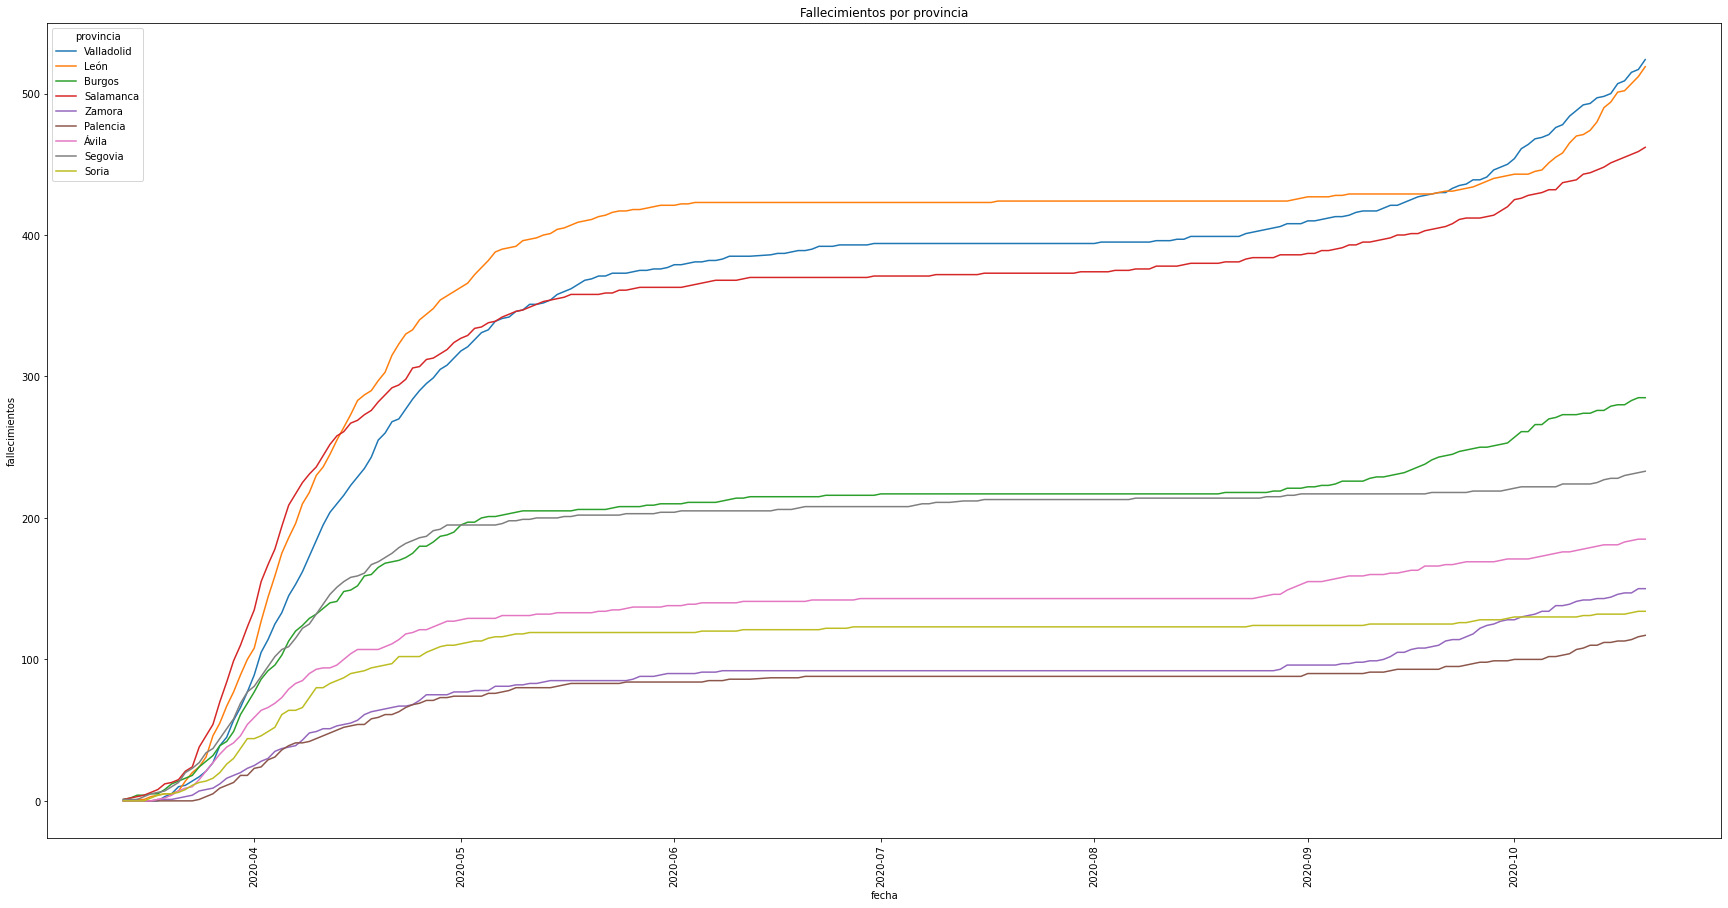

In [355]:
fig, ax = plt.subplots(figsize = (30, 15))
sns.lineplot(x = "fecha", y = "fallecimientos", data = fallecidos_castilla, estimator = "mean", hue='provincia', ci = False);
plt.xticks(rotation=90)
plt.title('Fallecimientos por provincia');

2. Evolución diaria de fallecimientos en la C.A de Castilla y León.

Text(0.5, 1.0, 'Covid 19 Evolucion de fallecimientos en CyL')

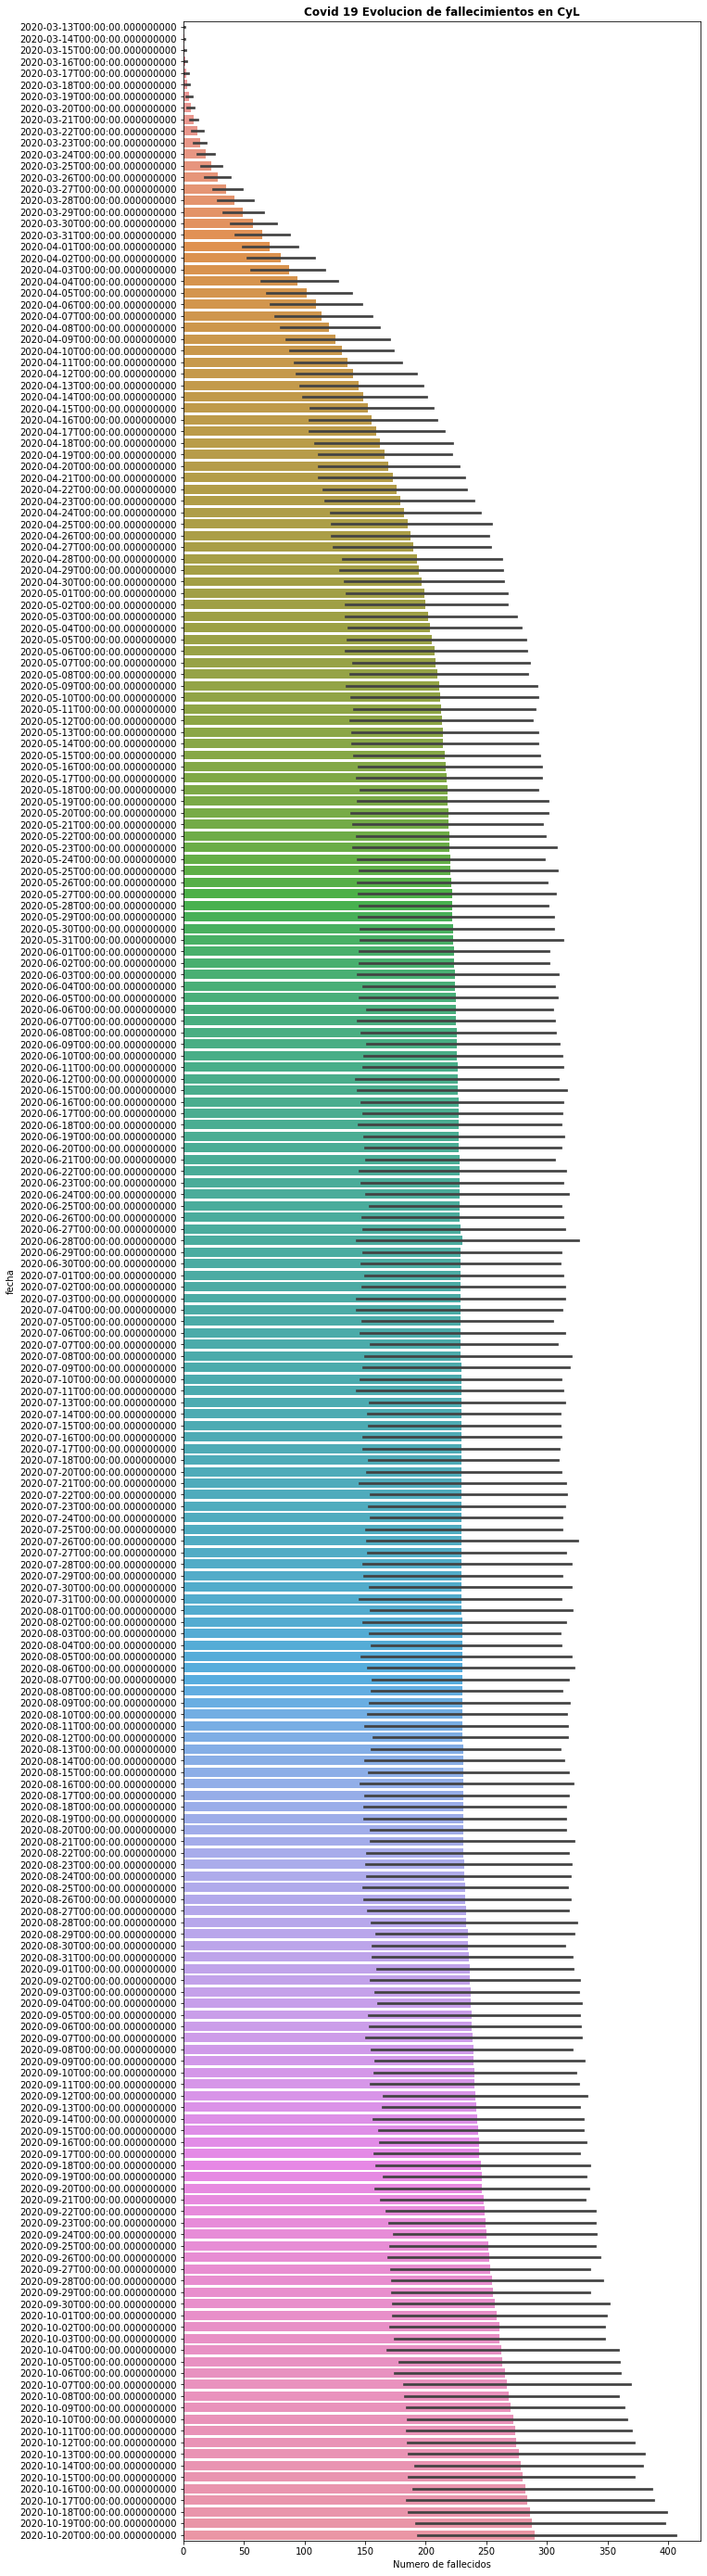

In [356]:
fig, (ax) = plt.subplots(1, figsize=(10, 50))
#make barplot
ax = sns.barplot(x="fallecimientos",
                 y="fecha",
                 data=fallecidos_castilla)
#set labels
ax.set_xlabel('Numero de fallecidos')
ax.set_title('Covid 19 Evolucion de fallecimientos en CyL', weight='bold')


3. Evolución diaria de casos hospitalizados en planta y en unidades críticas en Castilla y León

In [357]:
result_castilla = result[result['Comunidad Autónoma'] == 'CASTILLA Y LEÓN']

In [358]:
result_castilla.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,nuevos_fallecimientos,fallecimientos,codigo_ine,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma
1904,2020-03-18,Complejo Asistencial Universitario de León,León,2.0,32.0,0.0,6.0,0.402262,0.0,3.0,0.0,4,24089,15580,LE,460001,CASTILLA Y LEÓN,C08
1905,2020-03-18,Hospital El Bierzo,León,8.0,5.0,0.0,1.0,0.402262,1.0,0.0,1.0,0,24089,15580,LE,460001,CASTILLA Y LEÓN,C08
1906,2020-03-19,Hospital El Bierzo,León,4.0,8.0,2.0,1.0,0.402262,0.0,0.0,1.0,0,24089,15580,LE,460001,CASTILLA Y LEÓN,C08
1907,2020-03-19,Complejo Asistencial Universitario de León,León,3.0,36.0,0.0,7.0,0.402262,0.0,3.0,0.0,5,24089,15580,LE,460001,CASTILLA Y LEÓN,C08
1908,2020-03-20,Hospital El Bierzo,León,2.0,10.0,0.0,1.0,0.402262,0.0,0.0,0.0,0,24089,15580,LE,460001,CASTILLA Y LEÓN,C08


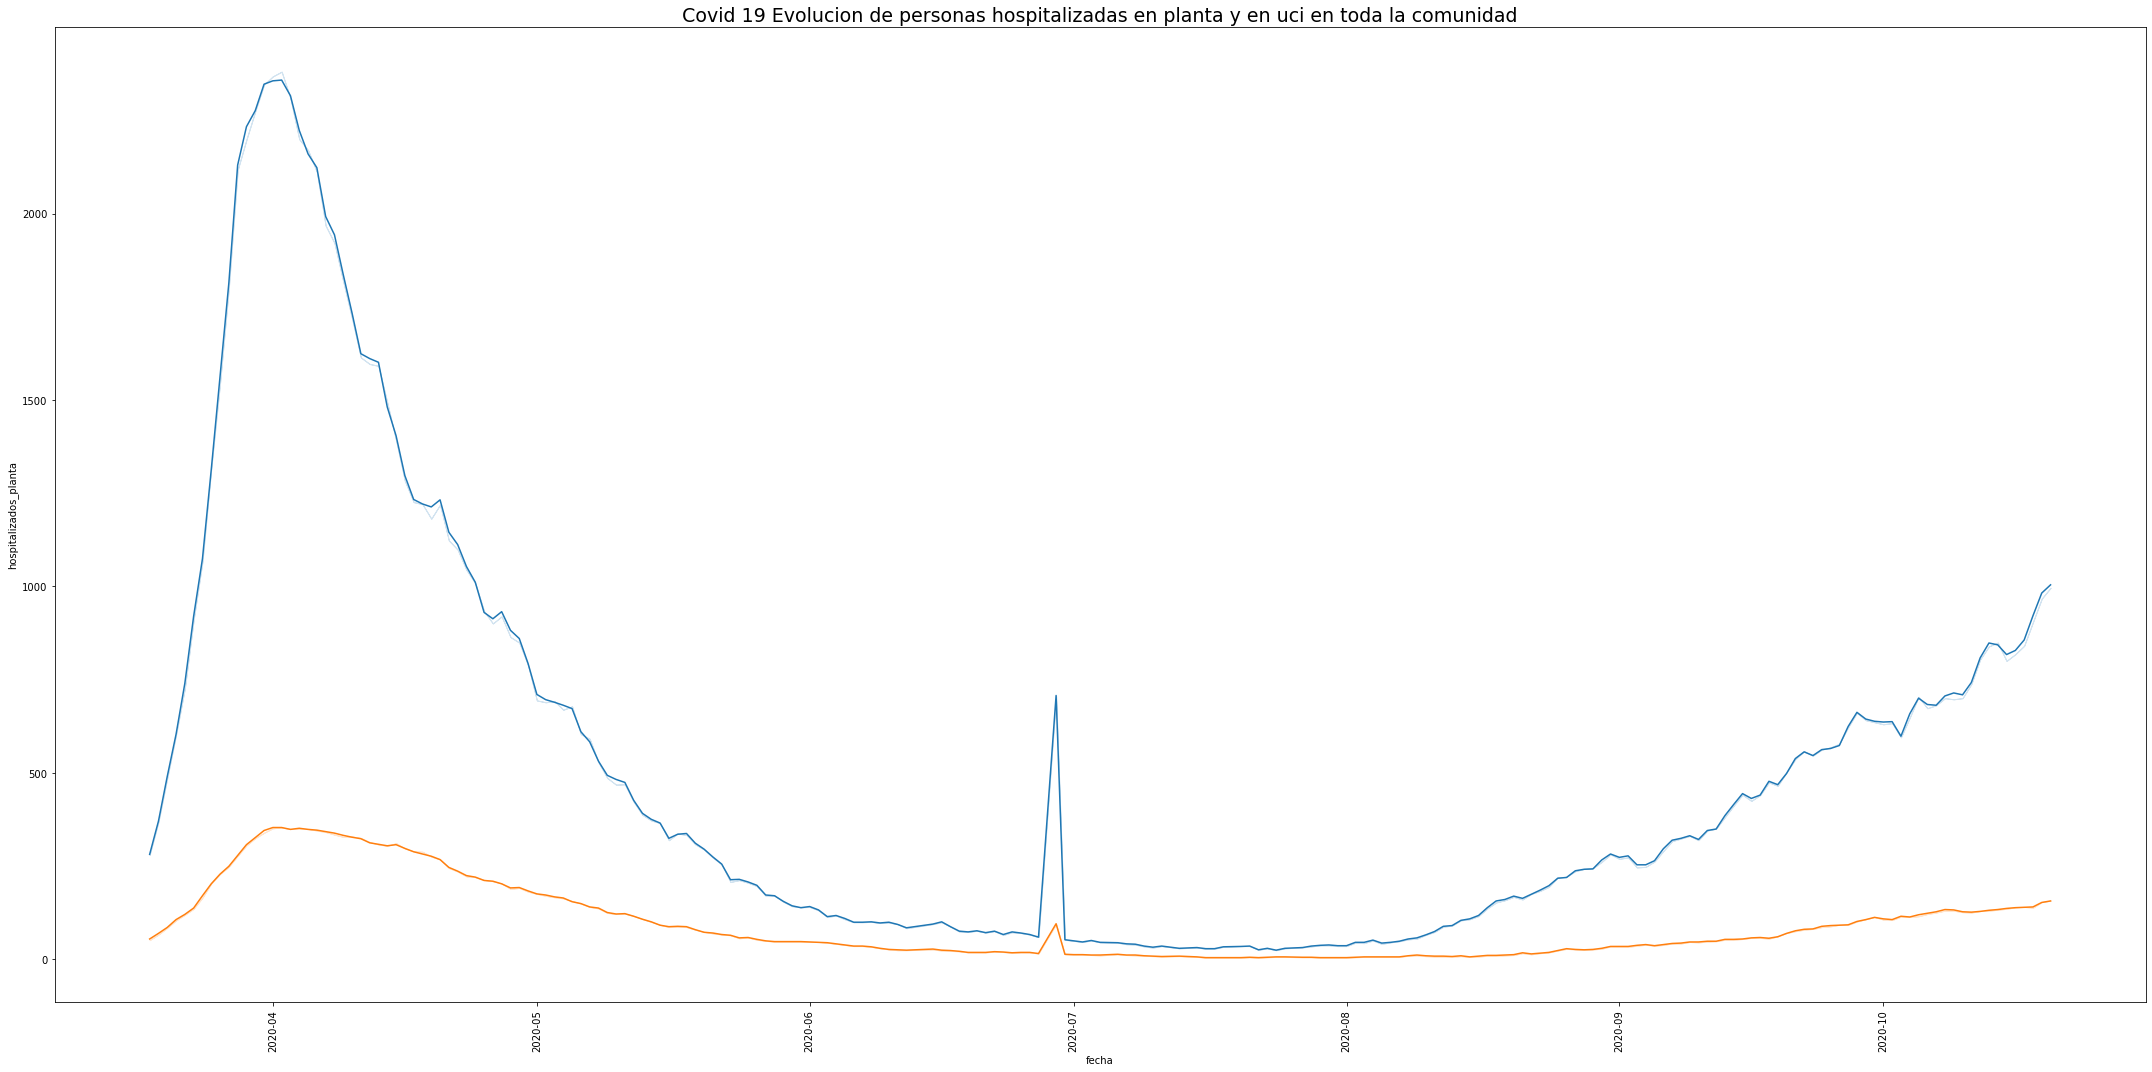

In [359]:
fig, ax = plt.subplots(figsize = (30, 15))
#make plot
sns.lineplot(x = "fecha", y = "hospitalizados_planta", data = result_castilla, estimator = "sum", ci = False)
sns.lineplot(x = "fecha", y = "hospitalizados_uci", data = result_castilla, estimator = "sum", ci = False);
#set labels
plt.xticks(rotation=90)
ax.set_xlabel('fecha')
plt.title('Covid 19 Evolucion de personas hospitalizadas en planta y en uci en toda la comunidad', size = 19)
plt.tight_layout();

4. Evolución diaria de casos hospitalizados en unidades críticas (por provincias)

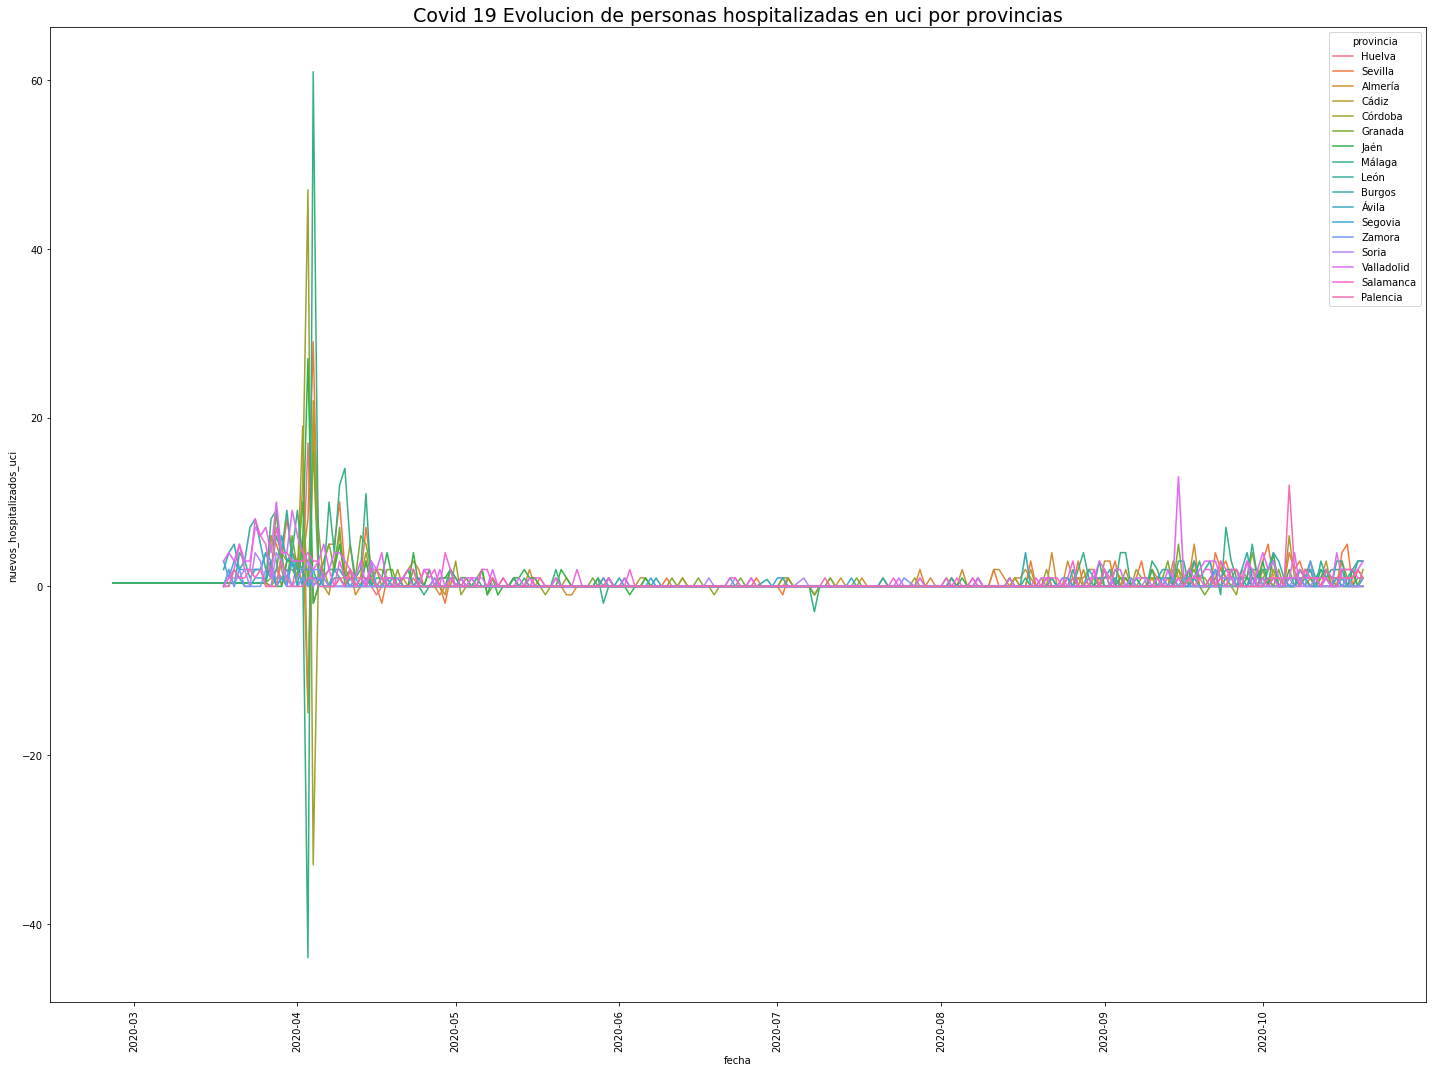

In [360]:
fig, ax = plt.subplots(figsize = (20, 15))
#make plot
sns.lineplot(x = "fecha", y = "nuevos_hospitalizados_uci", data = hospitales_covid, hue='provincia', estimator = "sum", ci = False)
#set labels
plt.xticks(rotation=90)
ax.set_xlabel('fecha')
plt.title('Covid 19 Evolucion de personas hospitalizadas en uci por provincias', size = 19)
plt.tight_layout();

5. Evolución de número de casos confirmados por provincia

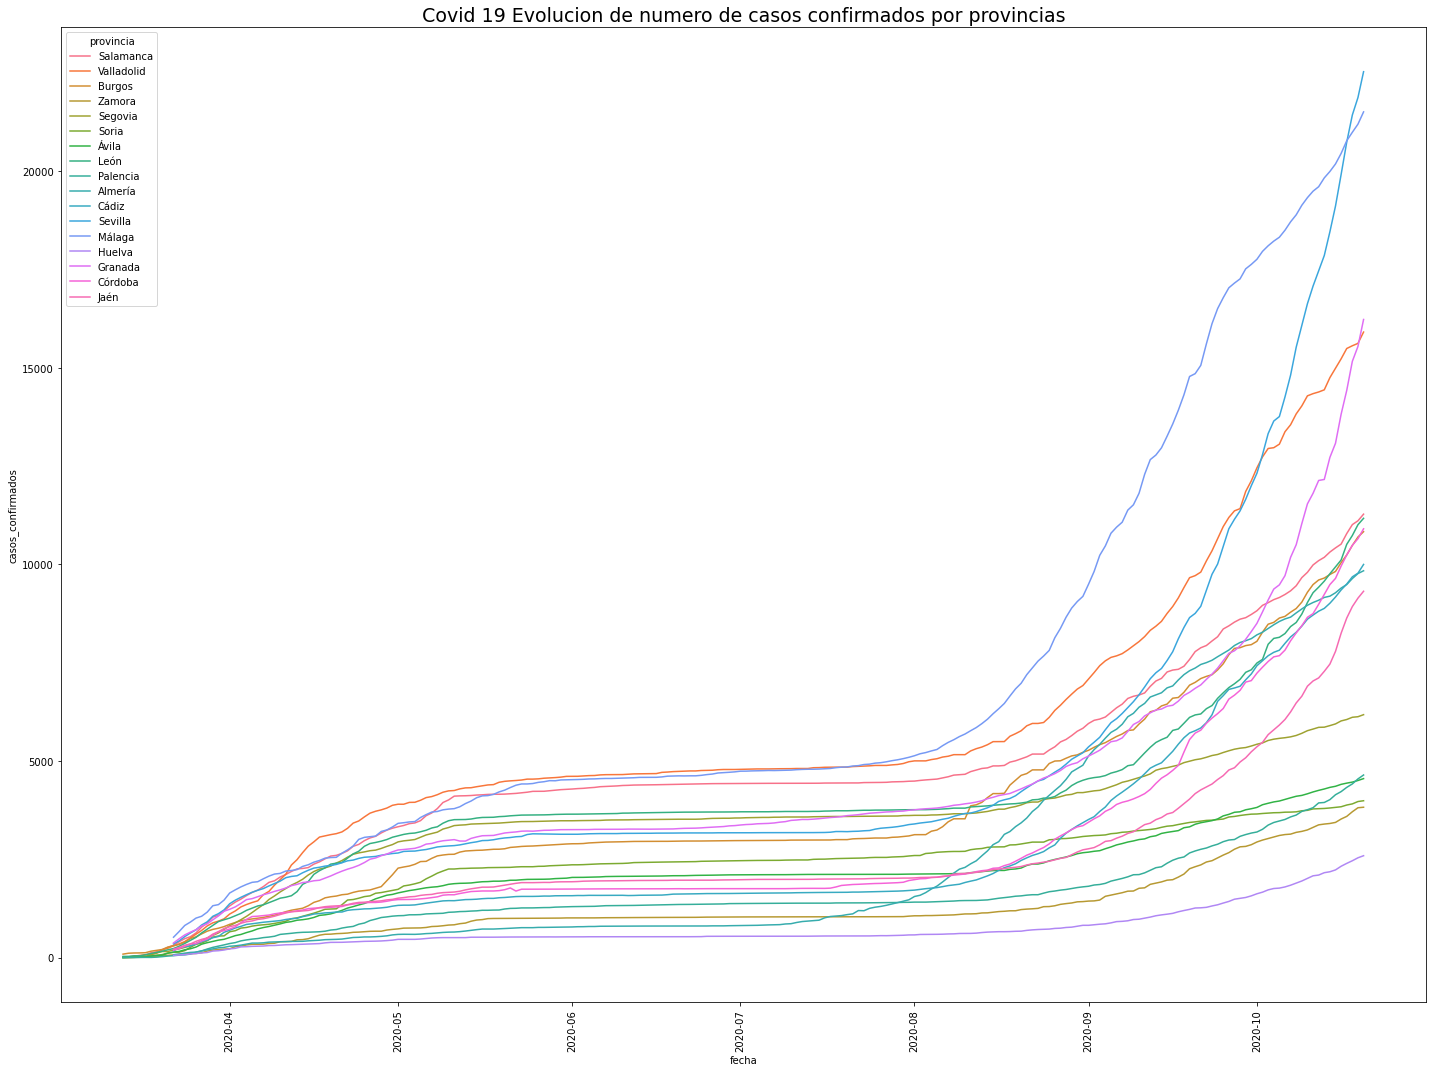

In [361]:
fig, ax = plt.subplots(figsize = (20, 15))
#make plot
sns.lineplot(x = "fecha", y = "casos_confirmados", data = provincia_covid, hue='provincia', estimator = "max", ci = False)
#set labels
plt.xticks(rotation=90)
ax.set_xlabel('fecha')
plt.title('Covid 19 Evolucion de numero de casos confirmados por provincias', size = 19)
plt.tight_layout();

6. Altas, fallecimientos, confirmados por provincias de Castilla y León.

In [372]:
castilla_completo = pd.merge(result, provincia_covid, on=['provincia', 'fecha', 'altas', 'fallecimientos'],how='inner')
castilla_completo = castilla_completo[castilla_completo['Comunidad Autónoma'] == 'CASTILLA Y LEÓN']
castilla_completo.head()

,fecha,hospital,provincia,nuevos_hospitalizados_planta,hospitalizados_planta,nuevos_hospitalizados_uci,hospitalizados_uci,porcentaje_ocupacion_uci,nuevas_altas,altas,...,codigo_ine_x,Superficie (Km2),Siglas provincia,Población,Comunidad Autónoma,Cod. Comunidad Autónoma,casos_confirmados,nuevos_positivos,codigo_ine_y,Posicion
1704,2020-03-18,Complejo Asistencial Universitario de León,León,2.0,32.0,0.0,6.0,0.402262,0.0,3.0,...,24089,15580,LE,460001,CASTILLA Y LEÓN,C08,106,31.0,24089,"42.666667,-6.0"
1705,2020-03-19,Complejo Asistencial Universitario de León,León,3.0,36.0,0.0,7.0,0.402262,0.0,3.0,...,24089,15580,LE,460001,CASTILLA Y LEÓN,C08,134,28.0,24089,"42.666667,-6.0"
1706,2020-03-20,Complejo Asistencial Universitario de León,León,17.0,53.0,0.0,6.0,0.402262,0.0,3.0,...,24089,15580,LE,460001,CASTILLA Y LEÓN,C08,164,30.0,24089,"42.666667,-6.0"
1707,2020-03-21,Complejo Asistencial Universitario de León,León,14.0,67.0,2.0,9.0,0.402262,0.0,3.0,...,24089,15580,LE,460001,CASTILLA Y LEÓN,C08,201,37.0,24089,"42.666667,-6.0"
1708,2020-03-22,Complejo Asistencial Universitario de León,León,26.0,93.0,1.0,10.0,0.402262,7.0,10.0,...,24089,15580,LE,460001,CASTILLA Y LEÓN,C08,233,32.0,24089,"42.666667,-6.0"


In [400]:
castilla_completo['provincia'].unique()
castilla_completo = castilla_completo.groupby('provincia').max


AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

TypeError: unhashable type: 'numpy.ndarray'

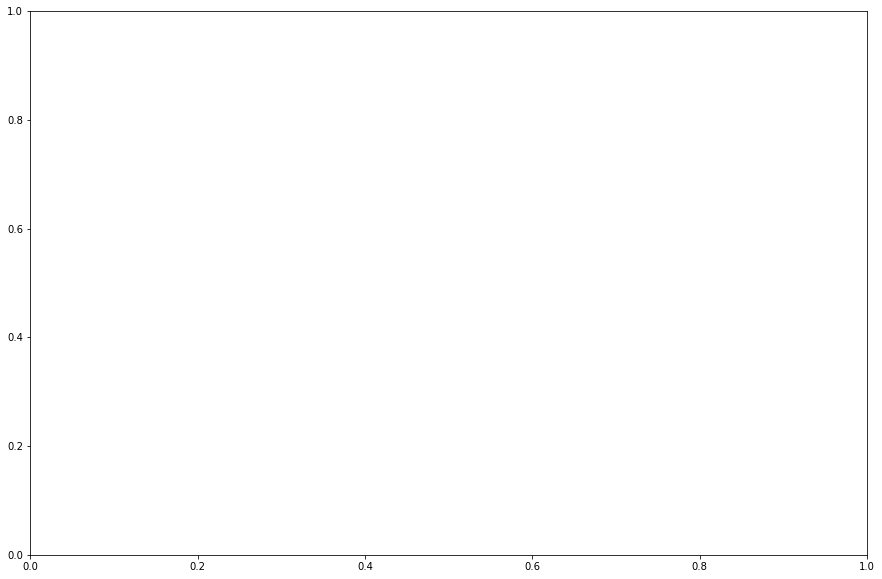

In [396]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[15, 10])

# Data to be plotted
#totalDeath = [113055, 37312, 5971, 7473, 33964]
#totalRecovery = [773480, 325602, 230688, 129095, 166584]
#activeCases = [1139958, 347973, 239999, 129360, 34730]
total_columns = ['Casos confirmados', 'Altas', 'Fallecimientos']
# Using numpy to group 3 different data with bars
X = np.arange(len(total_columns))

# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, castilla_completo['casos_confirmados'], color = 'blue', width = 0.25)
plt.bar(X + 0.25, castilla_completo['altas'], color = 'orange', width = 0.25)
plt.bar(X + 0.5, castilla_completo['fallecimientos'], color = 'green', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Casos confirmados', 'Altas', 'Fallecimientos'])

# Overiding the x axis with the country names
#plt.xticks([i + 0.25 for i in range(len(castilla_completo['provincia']))], ['Zamora', 'Soria', 'Ávila', 'Palencia', 'Segovia', 'León', 'Salamanca', 'Valladolid'])

# Giving the tilte for the plot
plt.title("Altas, fallecimientos, confirmados por provincia")
# Namimg the x and y axis
#plt.xlabel('Provincias')
plt.ylabel('Cases')
# Saving the plot as a 'png'
#plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()